In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import logging
log = logging.getLogger()
log.setLevel(logging.DEBUG)
plt.rc("savefig", dpi=400)

pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 500

files = ['Paris', 'Obama', 'Jupiter']

In [2]:
def rl_parse():
    data = {}
    for file in files:
        log.info("parsing file: ../data/{}.e2rdf".format(file))
        my_cols = ["Confidence", "Context", "Subject", "Predicate", "Predicate_lemmatized", "Object", "Other_arg", "Temporal", "Spatial", "Sentence_id", "Sentence"]
        values = pd.read_csv("../data/{}.e2rdf".format(file), names=my_cols, sep='\t', quoting=csv.QUOTE_NONE)
        #values.drop(values.columns[[0, 1, 8]], axis=1, inplace=True)
        data[file] = values
    return data

In [3]:
data = rl_parse()

INFO:root:parsing file: ../data/paris-openie.e2rdf
INFO:root:parsing file: ../data/obama-openie.e2rdf
INFO:root:parsing file: ../data/jupiter-openie.e2rdf


In [151]:
def word_count(s):
    array = s.split(" ")
    return len(array)

# Jupiter

In [4]:
data['jupiter']

,Confidence,Context,Subject,Predicate,Predicate_lemmatized,Object,Other_arg,Temporal,Spatial,Sentence_id,Sentence
0,0.967054,NaN,Jupiter,is,be,the fifth planet from the Sun and the largest planet in the Solar System,NaN,NaN,NaN,0,Jupiter is the fifth planet from the Sun and the largest planet in the Solar System.
1,0.884800,NaN,Jupiter,is the fifth planet from,be the fifth planet from,the Sun,NaN,NaN,NaN,0,Jupiter is the fifth planet from the Sun and the largest planet in the Solar System.
2,0.435166,NaN,It,is,be,a giant planet with a mass one-thousandth of that of the Sun,NaN,NaN,NaN,1,"It is a giant planet with a mass one-thousandth of that of the Sun, but is two and a half times that of all the other planets in the Solar System combined."
3,0.886695,NaN,It,is a giant planet with,be a giant planet with,a mass one-thousandth,NaN,NaN,NaN,1,"It is a giant planet with a mass one-thousandth of that of the Sun, but is two and a half times that of all the other planets in the Solar System combined."
4,0.948195,NaN,Jupiter,is,be,"a gas giant, along with Saturn",NaN,NaN,NaN,2,"Jupiter is a gas giant, along with Saturn (Uranus and Neptune are ice giants)."
5,0.945373,NaN,"a gas giant, along with Saturn",are,be,ice giants,NaN,NaN,NaN,2,"Jupiter is a gas giant, along with Saturn (Uranus and Neptune are ice giants)."
6,0.919776,NaN,Jupiter,was known,be know,to astronomers of ancient times,NaN,NaN,NaN,3,Jupiter was known to astronomers of ancient times.
7,0.872687,NaN,The Romans,named,name,it,after their god,NaN,NaN,4,The Romans named it after their god Jupiter.
8,0.975321,NaN,Jupiter,can reach,can reach,"an apparent magnitude of −2.94, bright enough to cast shadows",NaN,When viewed from Earth,NaN,5,"When viewed from Earth, Jupiter can reach an apparent magnitude of −2.94, bright enough to cast shadows, and making it on average the third-brightest object in the night sky after the Moon and Venus."
9,0.939716,NaN,Jupiter,making,make,on average the third-brightest object in the night sky after the Moon and Venus,NaN,NaN,NaN,5,"When viewed from Earth, Jupiter can reach an apparent magnitude of −2.94, bright enough to cast shadows, and making it on average the third-brightest object in the night sky after the Moon and Venus."


In [358]:
#Number of relations
len(data['jupiter'])

560

In [359]:
#Number of relations with distinct predicate
len(data['jupiter'].drop_duplicates(subset='Predicate', inplace=False))

371

In [360]:
#Number of relations with distinct lemmatized predicate
len(data['jupiter'].drop_duplicates(subset='Predicate_lemmatized', inplace=False))

333

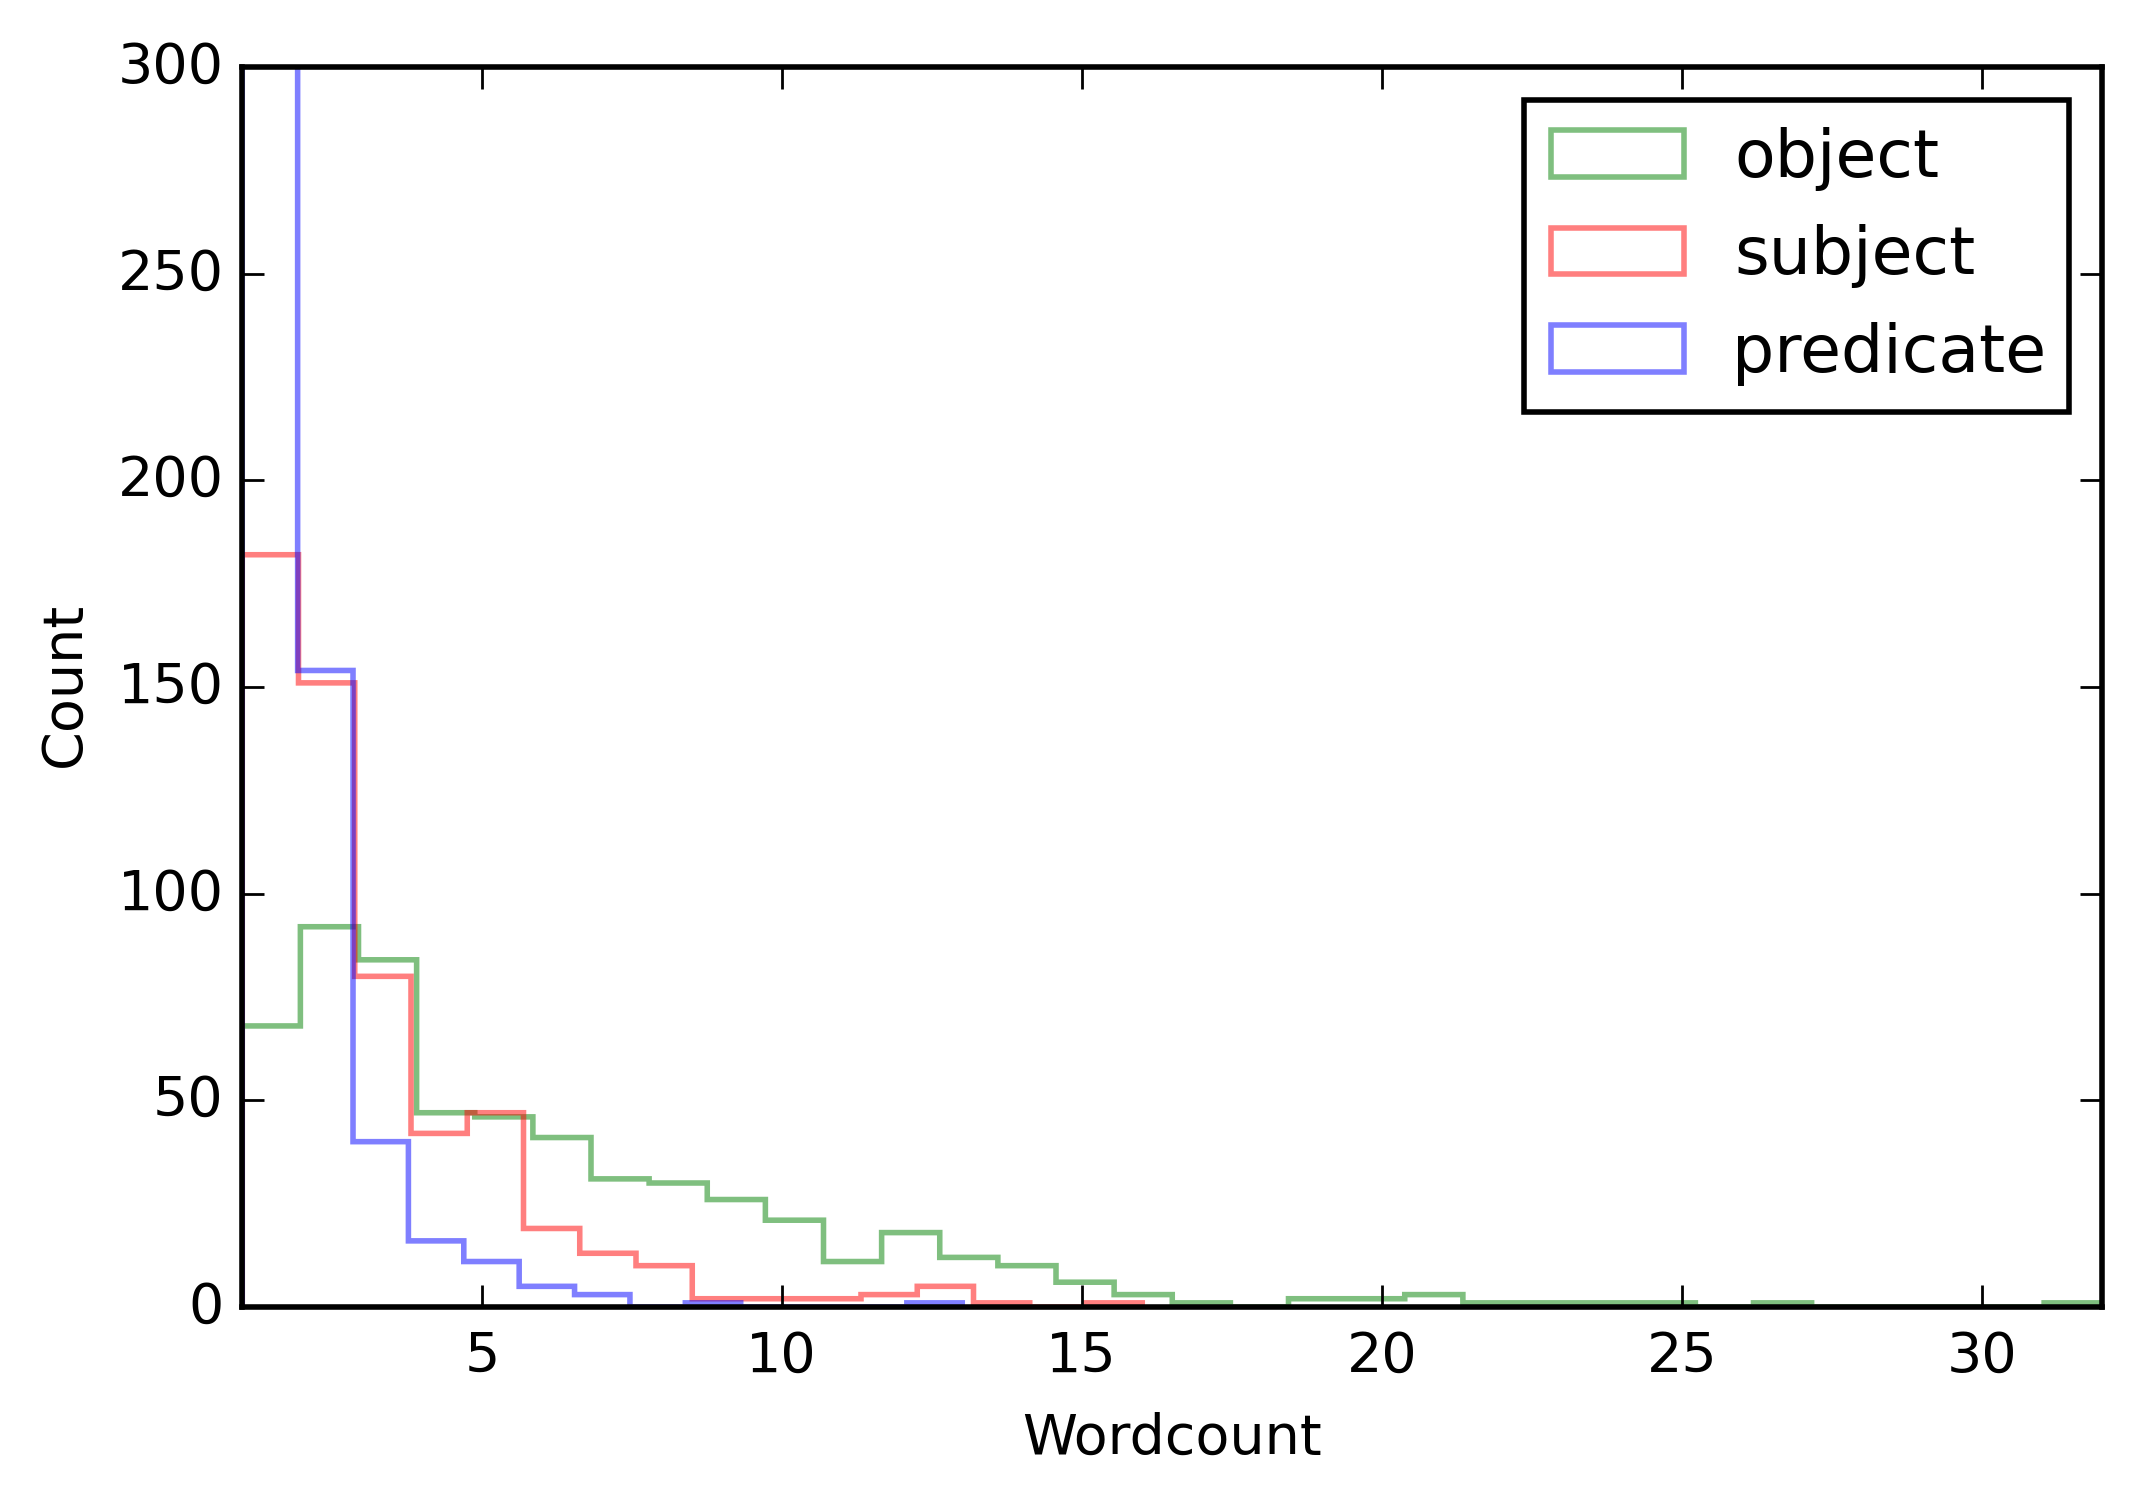

In [361]:
word_count_subject = data['jupiter']['Subject'].map(word_count)
word_count_predicate = data['jupiter']['Predicate'].map(word_count)
word_count_object = data['jupiter']['Object'].map(word_count)
max_word_num_subject = max(word_count_subject)
max_word_num_predicate = max(word_count_predicate)
max_word_num_object = max(word_count_object)
max_word_num = max([max_word_num_subject, max_word_num_predicate, max_word_num_object])
plt.hist(word_count_object, histtype='step', bins=max_word_num_object, color='g', label="object", alpha=0.5)
plt.hist(word_count_subject, histtype='step', bins=max_word_num_subject, color='r', label="subject", alpha=0.5)
plt.hist(word_count_predicate, histtype='step', bins=max_word_num_predicate, color='b', label="predicate", alpha=0.5)
plt.axis([1, max_word_num, 0, 300])
plt.legend()
plt.xlabel("Wordcount")
plt.ylabel("Count")
plt.show()

In [362]:
# number of relations with arguments with more than n word_count
n = 12
len(data['jupiter'][(data['jupiter']["Subject"].map(word_count) > n) | (data['jupiter']["Predicate"].map(word_count) > n) | (data['jupiter']["Object"].map(word_count) > n)])

52

In [363]:
data['jupiter'][(data['jupiter']["Subject"].map(word_count) > n) | (data['jupiter']["Predicate"].map(word_count) > n) | (data['jupiter']["Object"].map(word_count) > n)].drop(["Confidence", "Context", "Predicate_lemmatized", "Sentence_id"], axis=1)

,Subject,Predicate,Object,Other_arg,Temporal,Spatial,Sentence
0,Jupiter,is,the fifth planet from the Sun and the largest planet in the Solar System,NaN,NaN,NaN,Jupiter is the fifth planet from the Sun and the largest planet in the Solar System.
9,Jupiter,making,on average the third-brightest object in the night sky after the Moon and Venus,NaN,NaN,NaN,"When viewed from Earth, Jupiter can reach an apparent magnitude of −2.94, bright enough to cast shadows, and making it on average the third-brightest object in the night sky after the Moon and Venus."
15,the planet's shape,is,that of an oblate spheroid (it has a slight but noticeable bulge around the equator,NaN,NaN,NaN,"Because of its rapid rotation, the planet's shape is that of an oblate spheroid (it has a slight but noticeable bulge around the equator)."
44,It,is,the largest of the four giant planets in the Solar System and hence its largest planet,NaN,NaN,NaN,It is the largest of the four giant planets in the Solar System and hence its largest planet.
48,Jupiter's upper atmosphere,is composed,of about 88-92% hydrogen and 8-12% helium by percent volume of gas molecules,NaN,NaN,NaN,Jupiter's upper atmosphere is composed of about 88–92% hydrogen and 8–12% helium by percent volume of gas molecules.
62,This depletion,is,a result of precipitation of these elements into the interior of the planet,NaN,NaN,NaN,This depletion is a result of precipitation of these elements into the interior of the planet.
67,this,is,so massive that its barycenter with the Sun lies above the Sun's surface at 1.068 solar radii from the Sun's center,NaN,NaN,NaN,Jupiter's mass is 2.5 times that of all the other planets in the Solar System combined—this is so massive that its barycenter with the Sun lies above the Sun's surface at 1.068 solar radii from the Sun's center.
78,Theoretical models,indicate,"that if Jupiter had much more mass than it does at present, it would shrink",NaN,NaN,NaN,"Theoretical models indicate that if Jupiter had much more mass than it does at present, it would shrink."
79,the interior,would become,so much more compressed under the increased pressure that its volume would decrease despite the increasing amount of matter,NaN,NaN,above about 500 M⊕,"For small changes in mass, the radius would not change appreciably, and above about 500 M⊕ (1.6 Jupiter masses) the interior would become so much more compressed under the increased pressure that its volume would decrease despite the increasing amount of matter."
80,the interior,so much more compressed,under the increased pressure that its volume would decrease despite the increasing amount of matter,NaN,NaN,NaN,"For small changes in mass, the radius would not change appreciably, and above about 500 M⊕ (1.6 Jupiter masses) the interior would become so much more compressed under the increased pressure that its volume would decrease despite the increasing amount of matter."


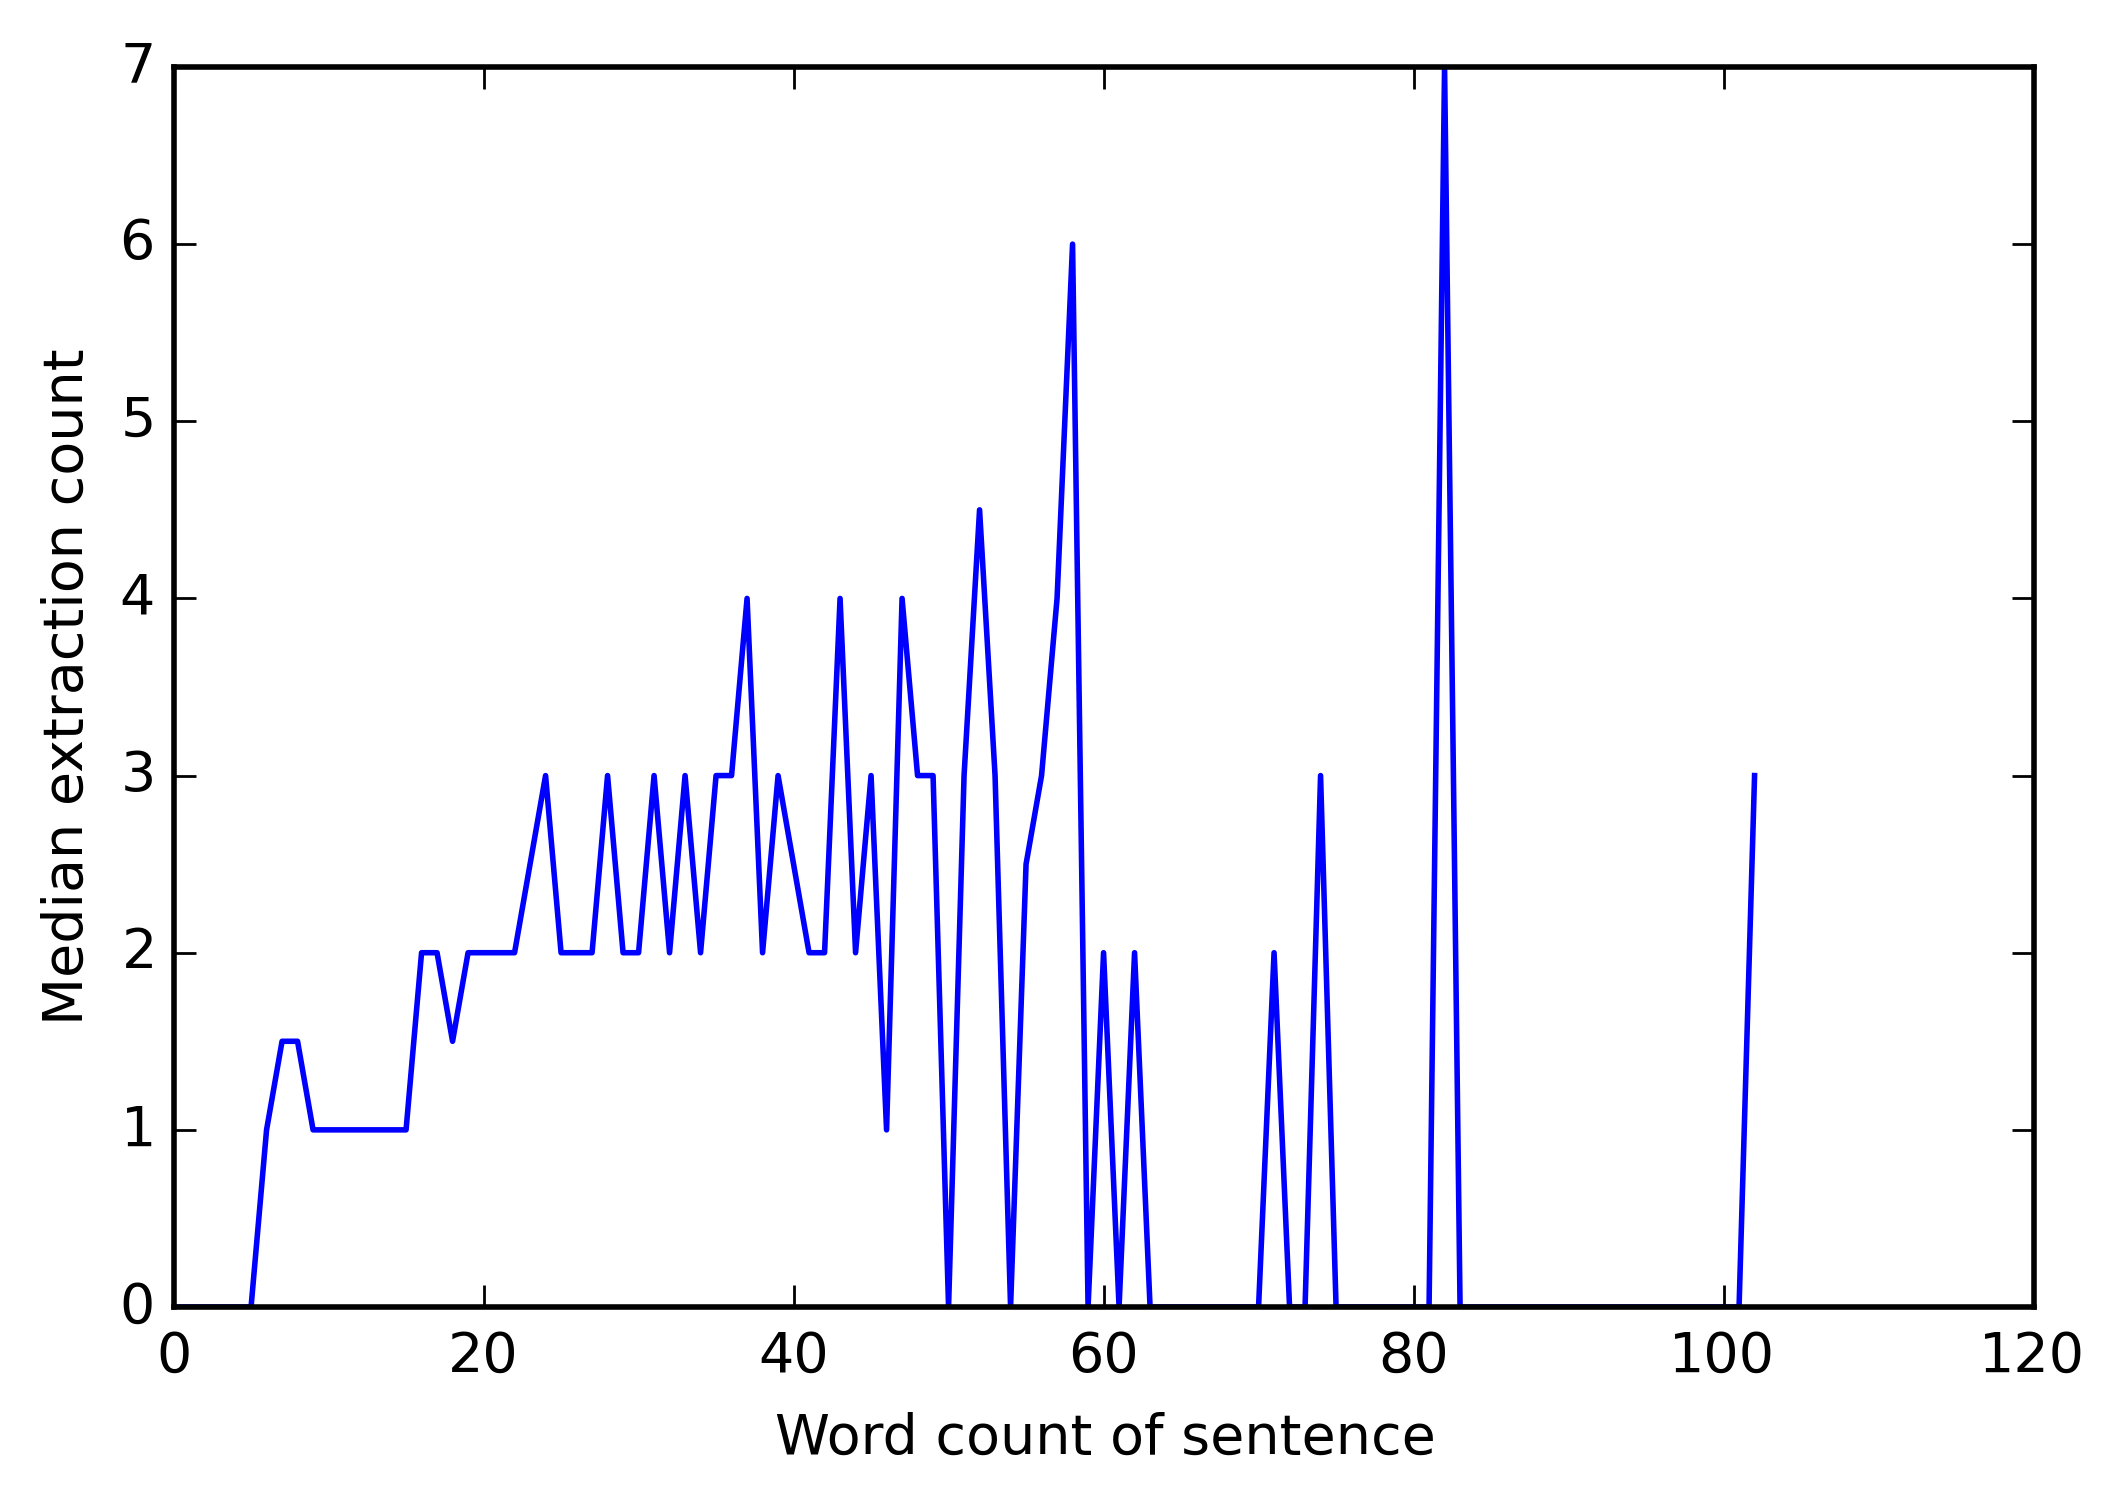

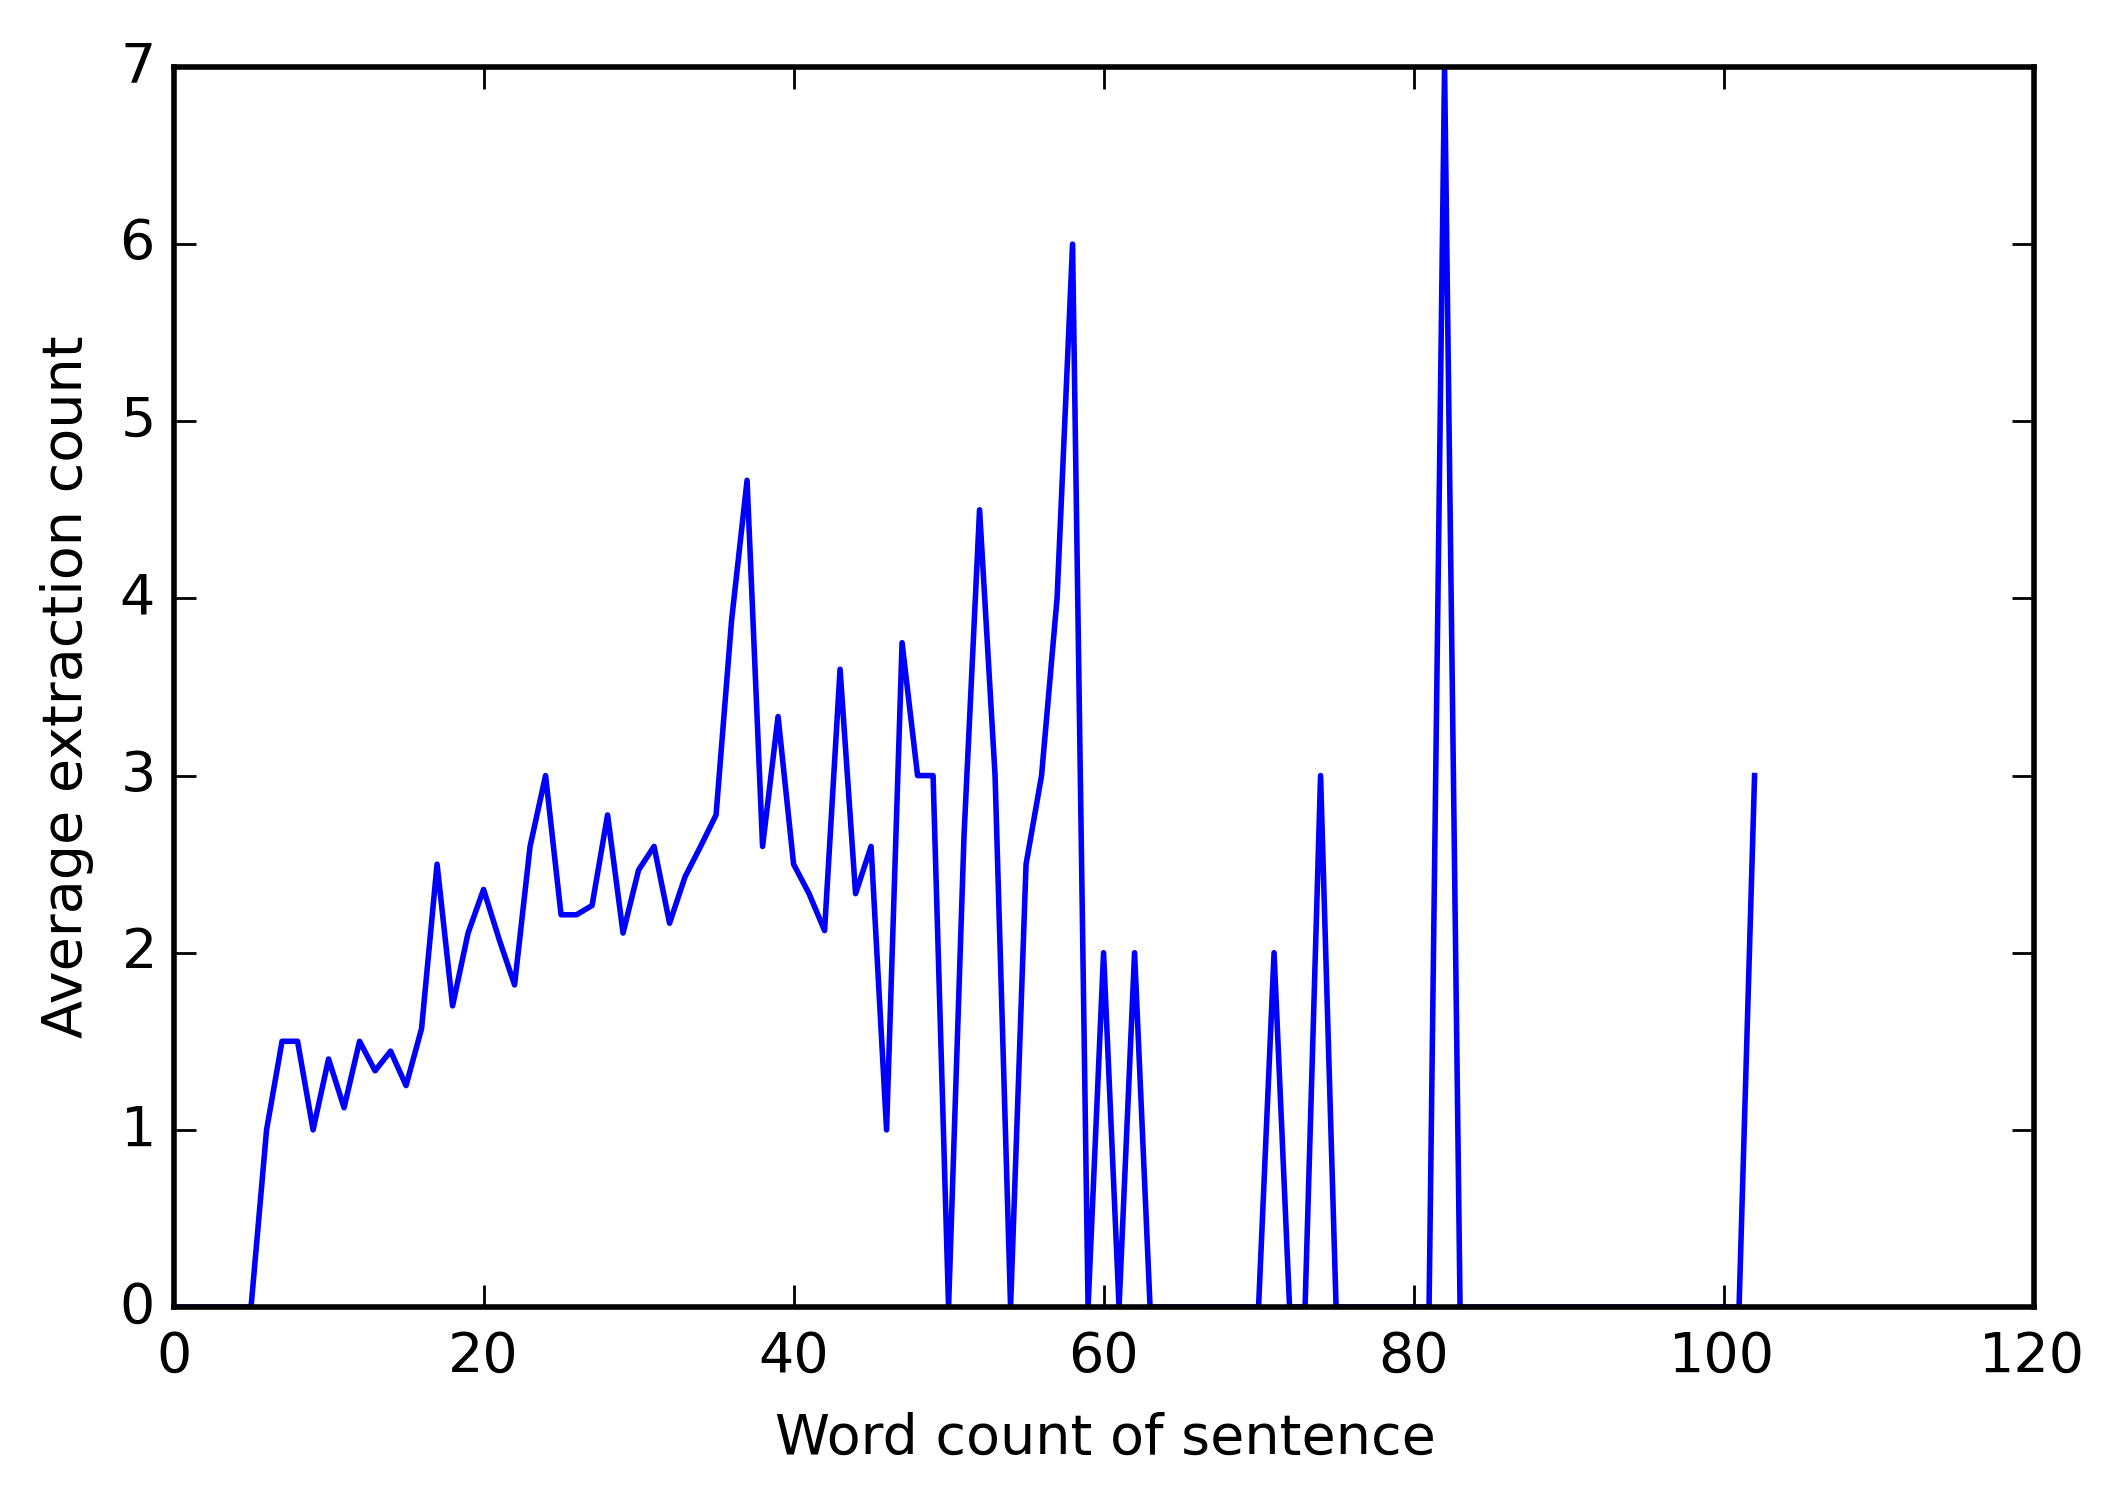

In [274]:
sentence_metadata = []
extractions_for_wordcounts = []
sentence_group = data['obama'].groupby('Sentence_id')
for g, grp in sentence_group:
    word_c = word_count(grp['Sentence'].iloc[0])
    ext_c = grp['Sentence_id'].count()
    if len(extractions_for_wordcounts) > word_c:
        if extractions_for_wordcounts[word_c][0] == 0:
            extractions_for_wordcounts[word_c] = [ext_c]
        else:
            extractions_for_wordcounts[word_c].append(ext_c)
    else:
        for i in range(len(extractions_for_wordcounts), word_c+1):
            extractions_for_wordcounts.append([0])
        extractions_for_wordcounts[word_c] = [ext_c]
    sentence_metadata.append({"id":grp['Sentence_id'].iloc[0], "extraction_count": ext_c, "word_count": word_c})

plt.plot([np.median(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Median extraction count")
plt.show()

plt.plot([np.average(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Average extraction count")
plt.show()

# Paris

In [364]:
#Number of relations
len(data['paris'])

1013

In [365]:
#Number of relations with distinct predicate
len(data['paris'].drop_duplicates(subset='Predicate', inplace=False))

559

In [366]:
#Number of relations with distinct lemmatized predicate
len(data['paris'].drop_duplicates(subset='Predicate_lemmatized', inplace=False))

504

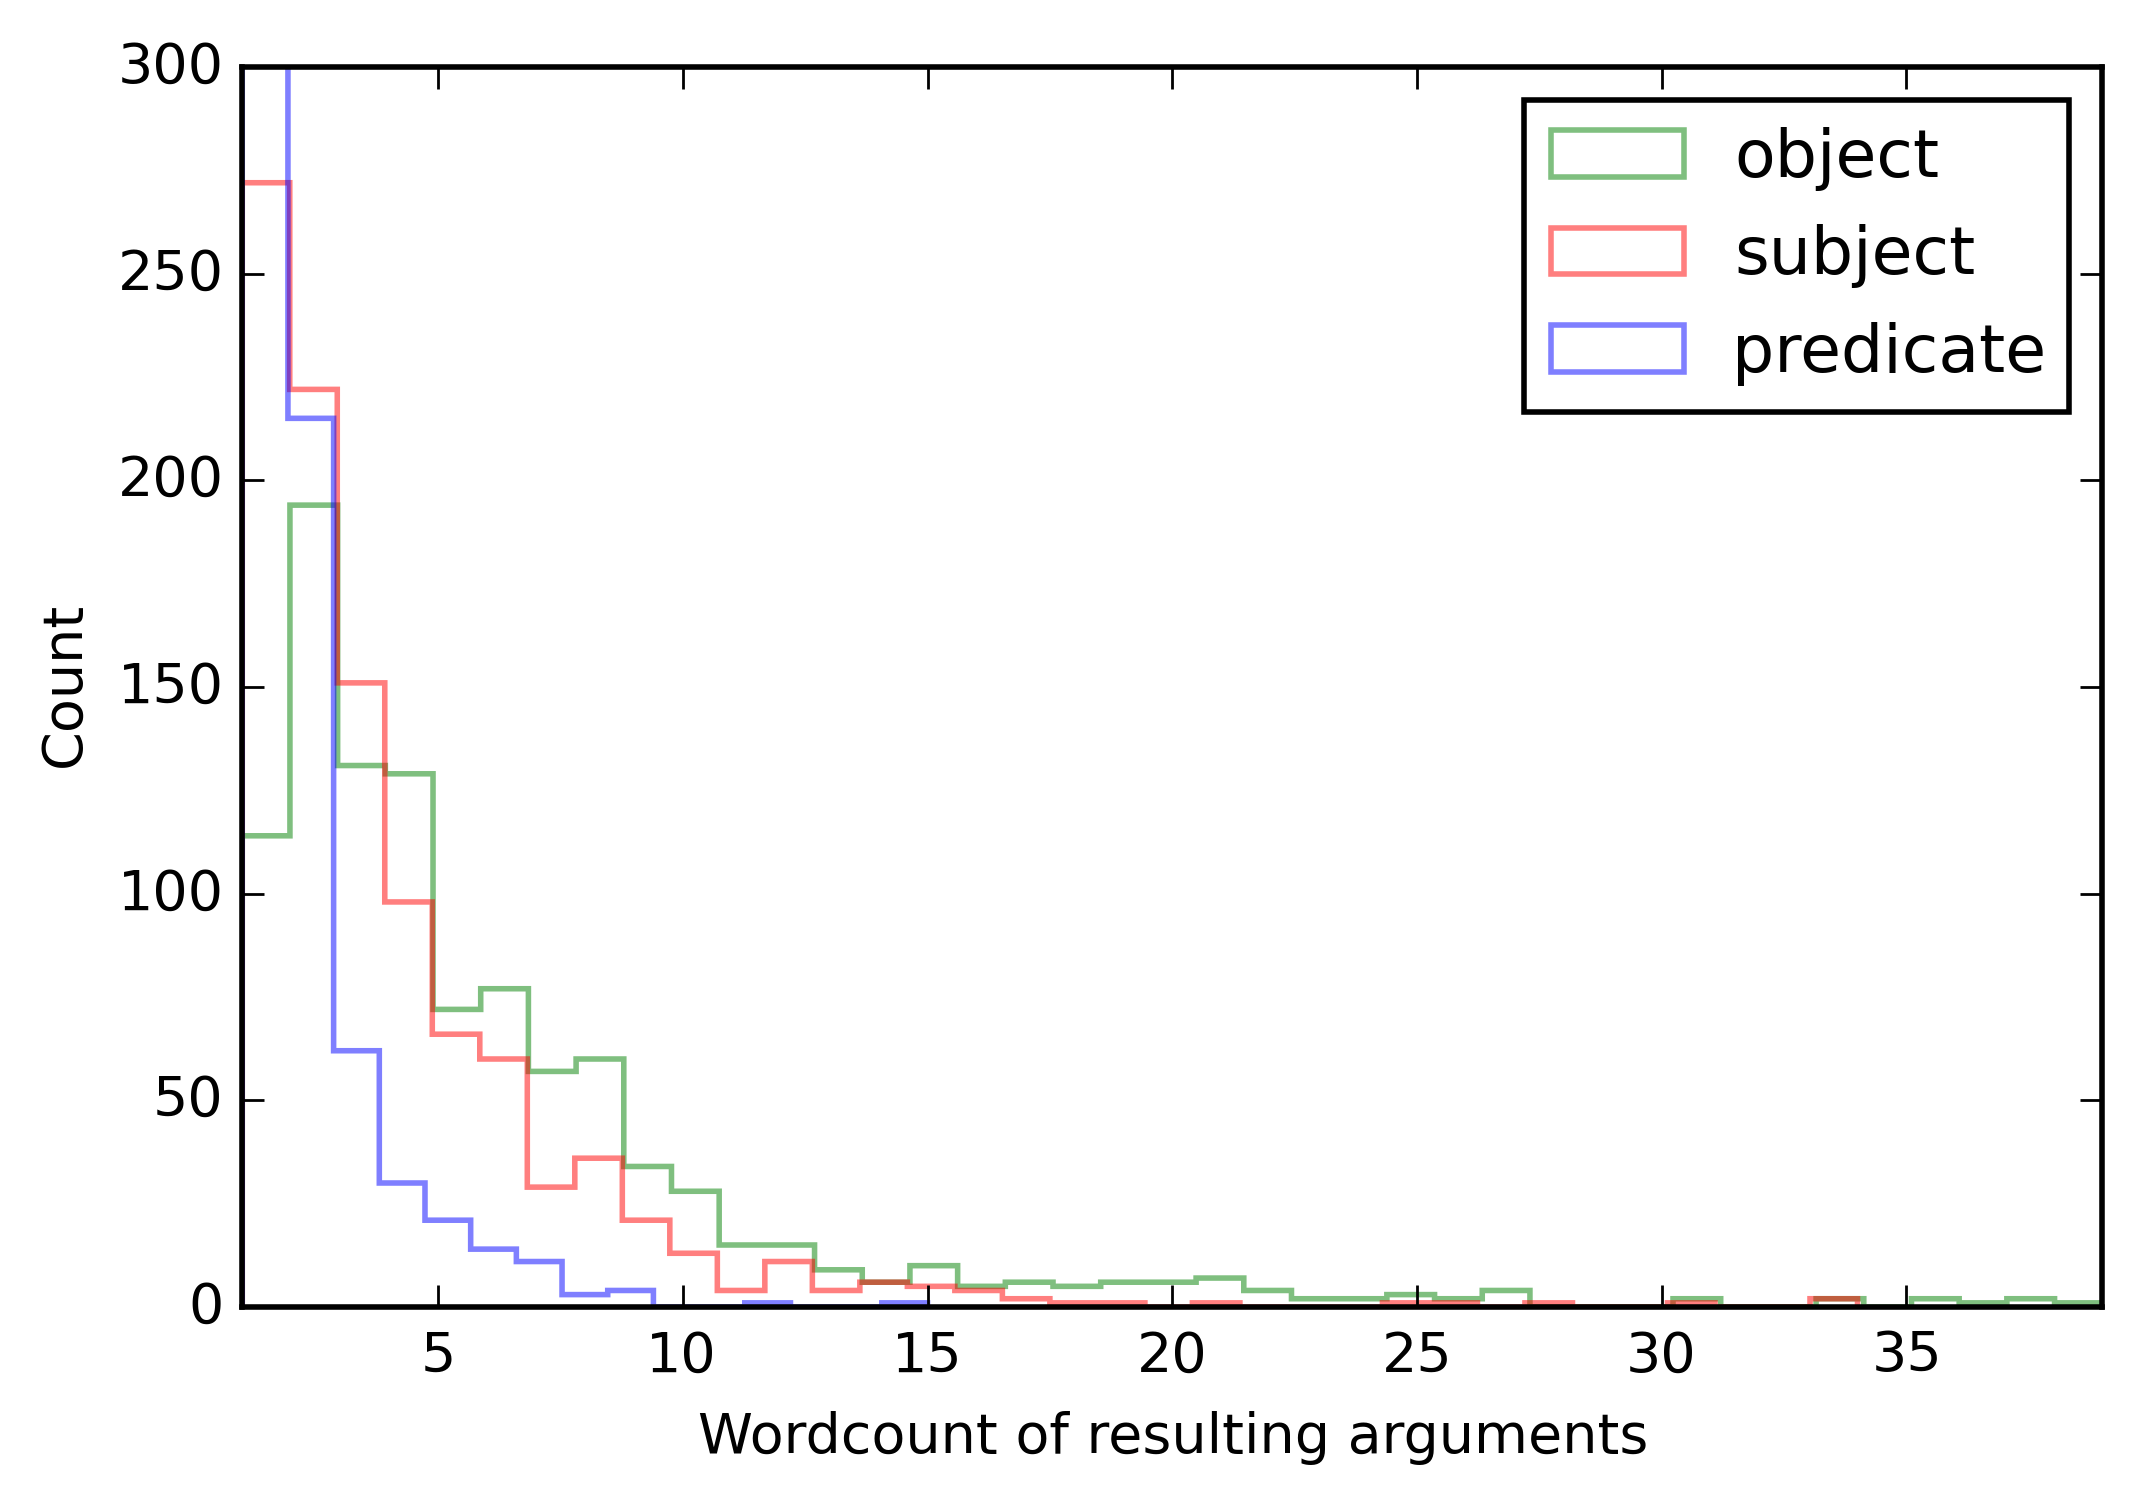

In [9]:
word_count_subject = data['paris']['Subject'].map(word_count)
word_count_predicate = data['paris']['Predicate'].map(word_count)
word_count_object = data['paris']['Object'].map(word_count)
max_word_num_subject = max(word_count_subject)
max_word_num_predicate = max(word_count_predicate)
max_word_num_object = max(word_count_object)
max_word_num = max([max_word_num_subject, max_word_num_predicate, max_word_num_object])
plt.hist(word_count_object, histtype='step', bins=max_word_num_object, color='g', label="object", alpha=0.5)
plt.hist(word_count_subject, histtype='step', bins=max_word_num_subject, color='r', label="subject", alpha=0.5)
plt.hist(word_count_predicate, histtype='step', bins=max_word_num_predicate, color='b', label="predicate", alpha=0.5)
plt.axis([1, max_word_num, 0, 300])
plt.legend()
plt.xlabel("Wordcount of resulting arguments")
plt.ylabel("Count")
plt.show()

In [368]:
# number of relations with arguments with more than n word_count
n = 12
len(data['paris'][(data['paris']["Subject"].map(word_count) > n) | (data['paris']["Predicate"].map(word_count) > n) | (data['paris']["Object"].map(word_count) > n)])

114

In [369]:
data['paris'][(data['paris']["Subject"].map(word_count) > n) | (data['paris']["Predicate"].map(word_count) > n) | (data['paris']["Object"].map(word_count) > n)].drop(["Confidence", "Context", "Predicate_lemmatized", "Sentence_id"], axis=1)

,Subject,Predicate,Object,Other_arg,Temporal,Spatial,Sentence
14,it,became,"an important centre of finance, commerce, fashion, science, and the arts, a position",NaN,In the 18th century,NaN,"In the 18th century, it was the centre stage for the French Revolution, and became an important centre of finance, commerce, fashion, science, and the arts, a position it still retains today."
25,The notable architectural landmarks of Paris,include,Notre Dame Cathedral (12th century); the Sainte-Chapelle (13th century); the Eiffel Tower (1889); and the Basilica of Sacré-Cœur on Montmartre,NaN,NaN,NaN,The notable architectural landmarks of Paris include Notre Dame Cathedral (12th century); the Sainte-Chapelle (13th century); the Eiffel Tower (1889); and the Basilica of Sacré-Cœur on Montmartre (1914).
30,Paris,is,home to the association football club Paris Saint-Germain and the rugby union club,NaN,NaN,NaN,Paris is home to the association football club Paris Saint-Germain and the rugby union club Stade Français.
33,Paris,hosts,the annual French Open Grand Slam tennis tournament on the red clay of Roland Garros,NaN,NaN,NaN,Paris hosts the annual French Open Grand Slam tennis tournament on the red clay of Roland Garros.
87,The army of the Duke of Burgundy and a force of about two hundred English soldiers,occupied,Paris,from May 1420,until 1436 | During the Hundred Years' War,NaN,"During the Hundred Years' War, The army of the Duke of Burgundy and a force of about two hundred English soldiers occupied Paris from May 1420 until 1436."
104,He,built,"five new bridges, a new chapel for the College of Sorbonne, and a palace",NaN,NaN,NaN,"He built five new bridges, a new chapel for the College of Sorbonne, and a palace for himself, the Palais Cardinal, which he bequeathed to Louis XIII, and which became, after his own death in 1642, the Palais-Royal."
116,the working-class neighbourhood of the Faubourg Saint-Antoine on the eastern site of the city,grew,more and more crowded with poor migrants from other regions of France,NaN,NaN,NaN,"A new boulevard, the Champs-Élysées, extended the city west to Étoile, while the working-class neighbourhood of the Faubourg Saint-Antoine on the eastern site of the city grew more and more crowded with poor migrants from other regions of France."
121,the Montgolfier Brothers,launched,"the first manned flight in a hot-air balloon on 21 November 1783, from the gardens of the Château de la Muette",NaN,NaN,NaN,"Diderot and d'Alembert published their Encyclopédie in 1751-52, and the Montgolfier Brothers launched the first manned flight in a hot-air balloon on 21 November 1783, from the gardens of the Château de la Muette."
129,"The first independent Paris Commune, or city council",elected,"a Mayor, the astronomer Jean Sylvain Bailly. Louis XVI and the royal family",NaN,on 15 July,NaN,"The first independent Paris Commune, or city council, met in the Hôtel de Ville and, on 15 July, elected a Mayor, the astronomer Jean Sylvain Bailly. Louis XVI and the royal family were brought to Paris and made virtual prisoners within the Tuileries Palace."
130,"The first independent Paris Commune, or city council","elected a Mayor, the astronomer Jean Sylvain Bailly. Louis XVI and the royal family made",virtual prisoners,NaN,NaN,within the Tuileries Palace,"The first independent Paris Commune, or city council, met in the Hôtel de Ville and, on 15 July, elected a Mayor, the astronomer Jean Sylvain Bailly. Louis XVI and the royal family were brought to Paris and made virtual prisoners within the Tuileries Palace."


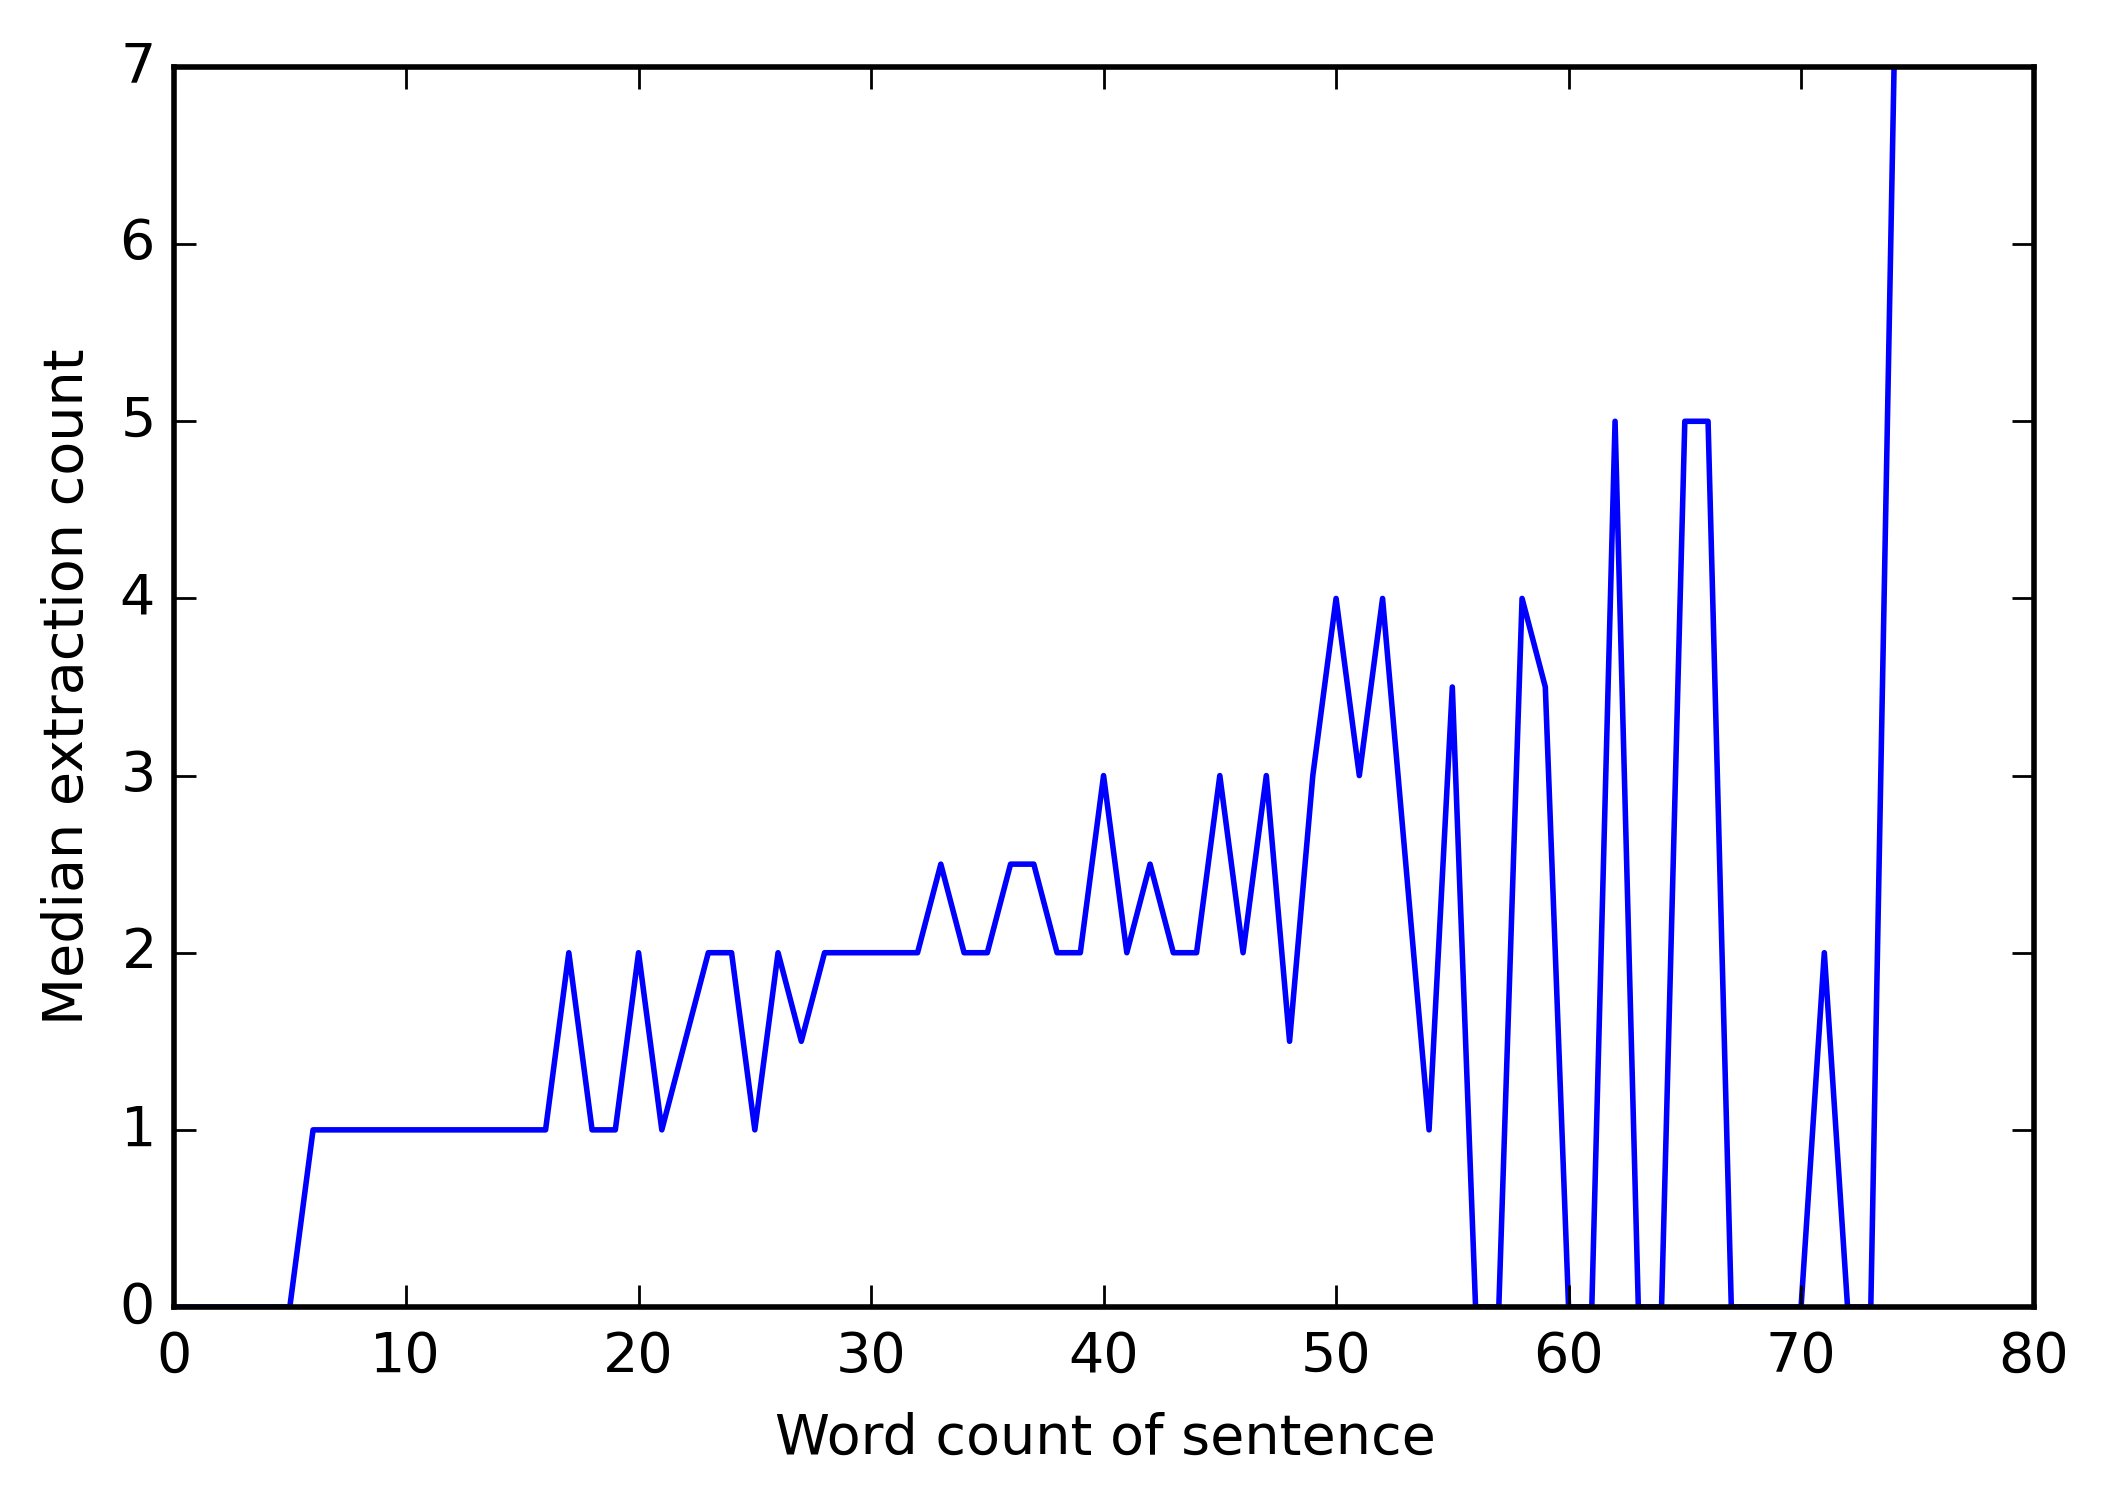

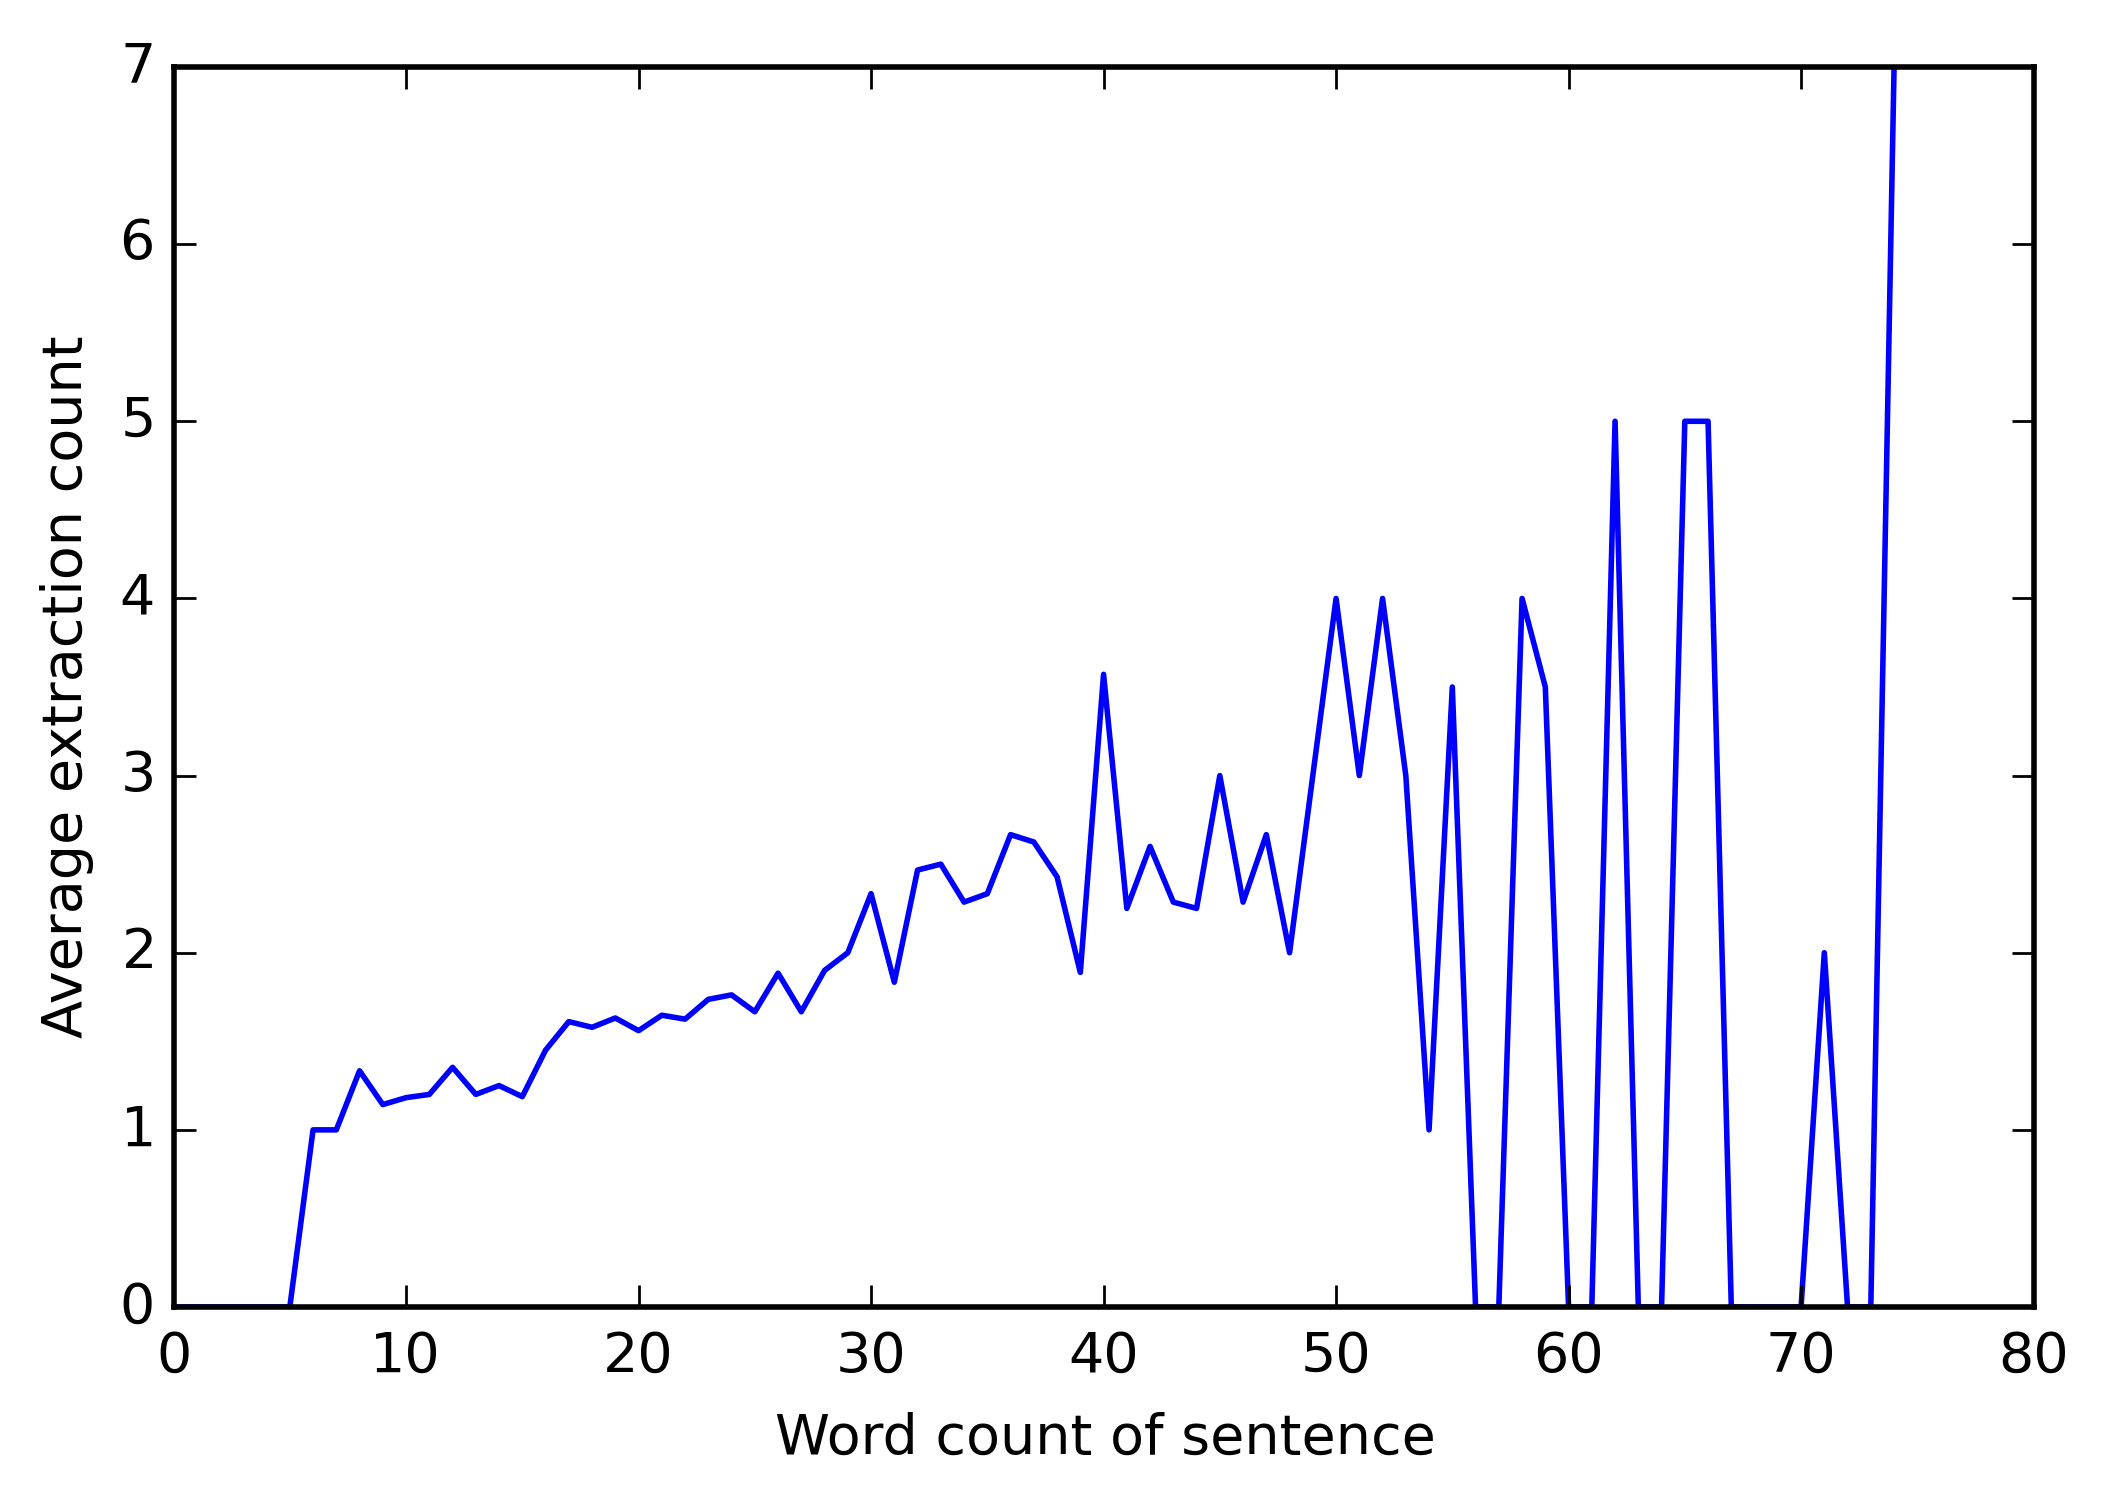

In [272]:
sentence_metadata = []
extractions_for_wordcounts = []
sentence_group = data['paris'].groupby('Sentence_id')
for g, grp in sentence_group:
    word_c = word_count(grp['Sentence'].iloc[0])
    ext_c = grp['Sentence_id'].count()
    if len(extractions_for_wordcounts) > word_c:
        if extractions_for_wordcounts[word_c][0] == 0:
            extractions_for_wordcounts[word_c] = [ext_c]
        else:
            extractions_for_wordcounts[word_c].append(ext_c)
    else:
        for i in range(len(extractions_for_wordcounts), word_c+1):
            extractions_for_wordcounts.append([0])
        extractions_for_wordcounts[word_c] = [ext_c]
    sentence_metadata.append({"id":grp['Sentence_id'].iloc[0], "extraction_count": ext_c, "word_count": word_c})

plt.plot([np.median(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Median extraction count")
plt.show()

plt.plot([np.average(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Average extraction count")
plt.show()

# Obama

In [370]:
#Number of relations
len(data['obama'])

798

In [371]:
#Number of relations with distinct predicate
len(data['obama'].drop_duplicates(subset='Predicate', inplace=False))

526

In [372]:
#Number of relations with distinct lemmatized predicate
len(data['obama'].drop_duplicates(subset='Predicate_lemmatized', inplace=False))

479

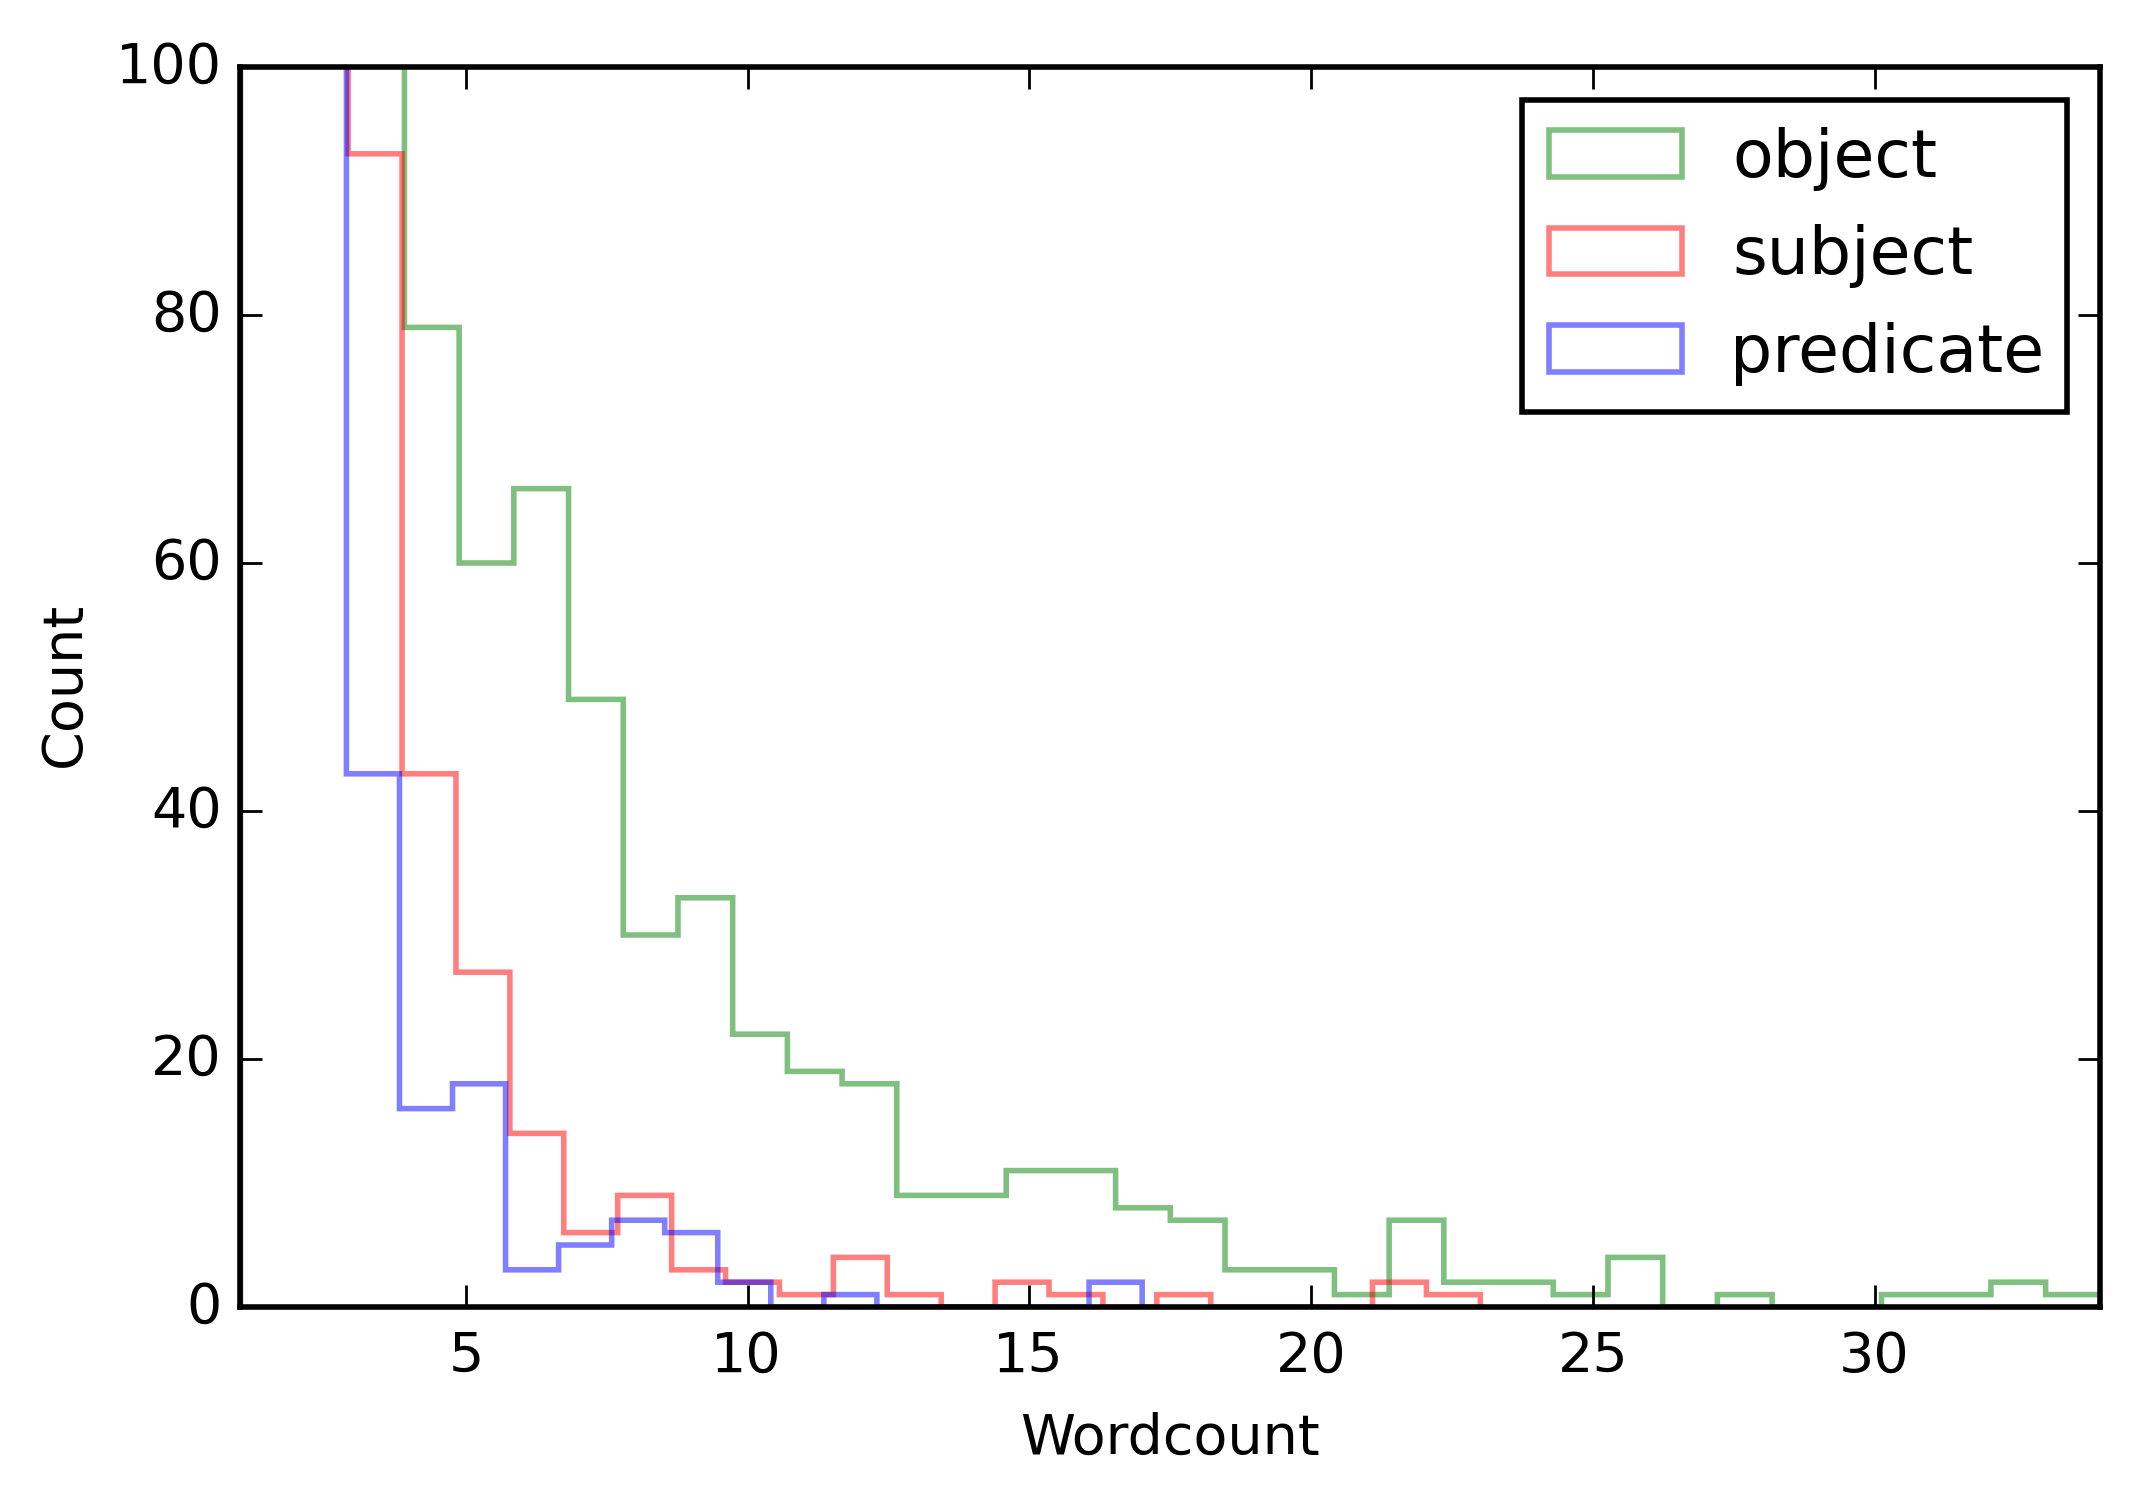

In [5]:
word_count_subject = data['obama']['Subject'].map(word_count)
word_count_predicate = data['obama']['Predicate'].map(word_count)
word_count_object = data['obama']['Object'].map(word_count)
max_word_num_subject = max(word_count_subject)
max_word_num_predicate = max(word_count_predicate)
max_word_num_object = max(word_count_object)
max_word_num = max([max_word_num_subject, max_word_num_predicate, max_word_num_object])
plt.hist(word_count_object, histtype='step', bins=max_word_num_object, color='g', label="object", alpha=0.5)
plt.hist(word_count_subject, histtype='step', bins=max_word_num_subject, color='r', label="subject", alpha=0.5)
plt.hist(word_count_predicate, histtype='step', bins=max_word_num_predicate, color='b', label="predicate", alpha=0.5)
plt.axis([1, max_word_num, 0, 100])
plt.legend()
plt.xlabel("Wordcount")
plt.ylabel("Count")
plt.show()

In [7]:
# number of relations with arguments with more than n word_count
n = 12
len(data['obama'][(data['obama']["Subject"].map(word_count) > n) | (data['obama']["Predicate"].map(word_count) > n) | (data['obama']["Object"].map(word_count) > n)])

92

In [8]:
data['obama'][(data['obama']["Subject"].map(word_count) > n) | (data['obama']["Predicate"].map(word_count) > n) | (data['obama']["Object"].map(word_count) > n)].drop(["Confidence", "Context", "Predicate_lemmatized", "Sentence_id"], axis=1)

,Subject,Predicate,Object,Other_arg,Temporal,Spatial,Sentence
12,He,served,three terms representing the 13th District in the Illinois Senate from 1997 to 2004,NaN,NaN,NaN,"He served three terms representing the 13th District in the Illinois Senate from 1997 to 2004, running unsuccessfully for the United States House of Representatives in 2000."
13,He,served three terms representing the 13th District in the Illinois Senate from 1997 to 2004 running unsuccessfully,for the United States House of Representatives,NaN,in 2000,NaN,"He served three terms representing the 13th District in the Illinois Senate from 1997 to 2004, running unsuccessfully for the United States House of Representatives in 2000."
30,Obama,signed,the Budget Control Act of 2011 and the American Taxpayer Relief Act of 2012,NaN,NaN,NaN,"In January 2011, the Republicans regained control of the House of Representatives as the Democratic Party lost a total of 63 seats; and, after a lengthy debate over federal spending and whether or not to raise the nation's debt limit, Obama signed the Budget Control Act of 2011 and the American Taxpayer Relief Act of 2012."
35,Obama,has promoted,domestic policies related to gun control in response to the Sandy Hook Elementary School shooting,NaN,During his second term,NaN,"During his second term, Obama has promoted domestic policies related to gun control in response to the Sandy Hook Elementary School shooting, and has called for full equality for LGBT Americans, while his administration has filed briefs which urged the Supreme Court to strike down the Defense of Marriage Act of 1996 and California's Proposition 8 as unconstitutional."
39,his administration,has filed,briefs which urged the Supreme Court to strike down the Defense of Marriage Act of 1996 and California's Proposition 8 as unconstitutional,NaN,NaN,NaN,"During his second term, Obama has promoted domestic policies related to gun control in response to the Sandy Hook Elementary School shooting, and has called for full equality for LGBT Americans, while his administration has filed briefs which urged the Supreme Court to strike down the Defense of Marriage Act of 1996 and California's Proposition 8 as unconstitutional."
86,The opportunity that Hawaii offered-to experience a variety of cultures in a climate of mutual respect,became,an integral part of my world view,NaN,NaN,NaN,"Reflecting later on his years in Honolulu, Obama wrote: ""The opportunity that Hawaii offered—to experience a variety of cultures in a climate of mutual respect—became an integral part of my world view, and a basis for the values that I hold most dear."""
87,Hawaii,offered,The opportunity that Hawaii offered-to experience a variety of cultures in a climate of mutual respect,NaN,NaN,NaN,"Reflecting later on his years in Honolulu, Obama wrote: ""The opportunity that Hawaii offered—to experience a variety of cultures in a climate of mutual respect—became an integral part of my world view, and a basis for the values that I hold most dear."""
96,Obama,made calling,for Occidental to participate in the disinvestment from South Africa in response to that nation's policy of apartheid,NaN,NaN,NaN,"In February 1981, Obama made his first public speech, calling for Occidental to participate in the disinvestment from South Africa in response to that nation's policy of apartheid."
104,He,worked,"for a year at the Business International Corporation, then at the New York Public Interest Research Group",NaN,NaN,NaN,"He graduated with a Bachelor of Arts in 1983 and worked for a year at the Business International Corporation, then at the New York Public Interest Research Group."
115,a church-based community organization,comprising,"eight Catholic parishes in Roseland, West Pullman, and Riverdale on Chicago's South Side",NaN,originally,NaN,"Two years after graduating, Obama was hired in Chicago as director of the Developing Communities Project, a church-based community organization originally comprising eight Catholic 

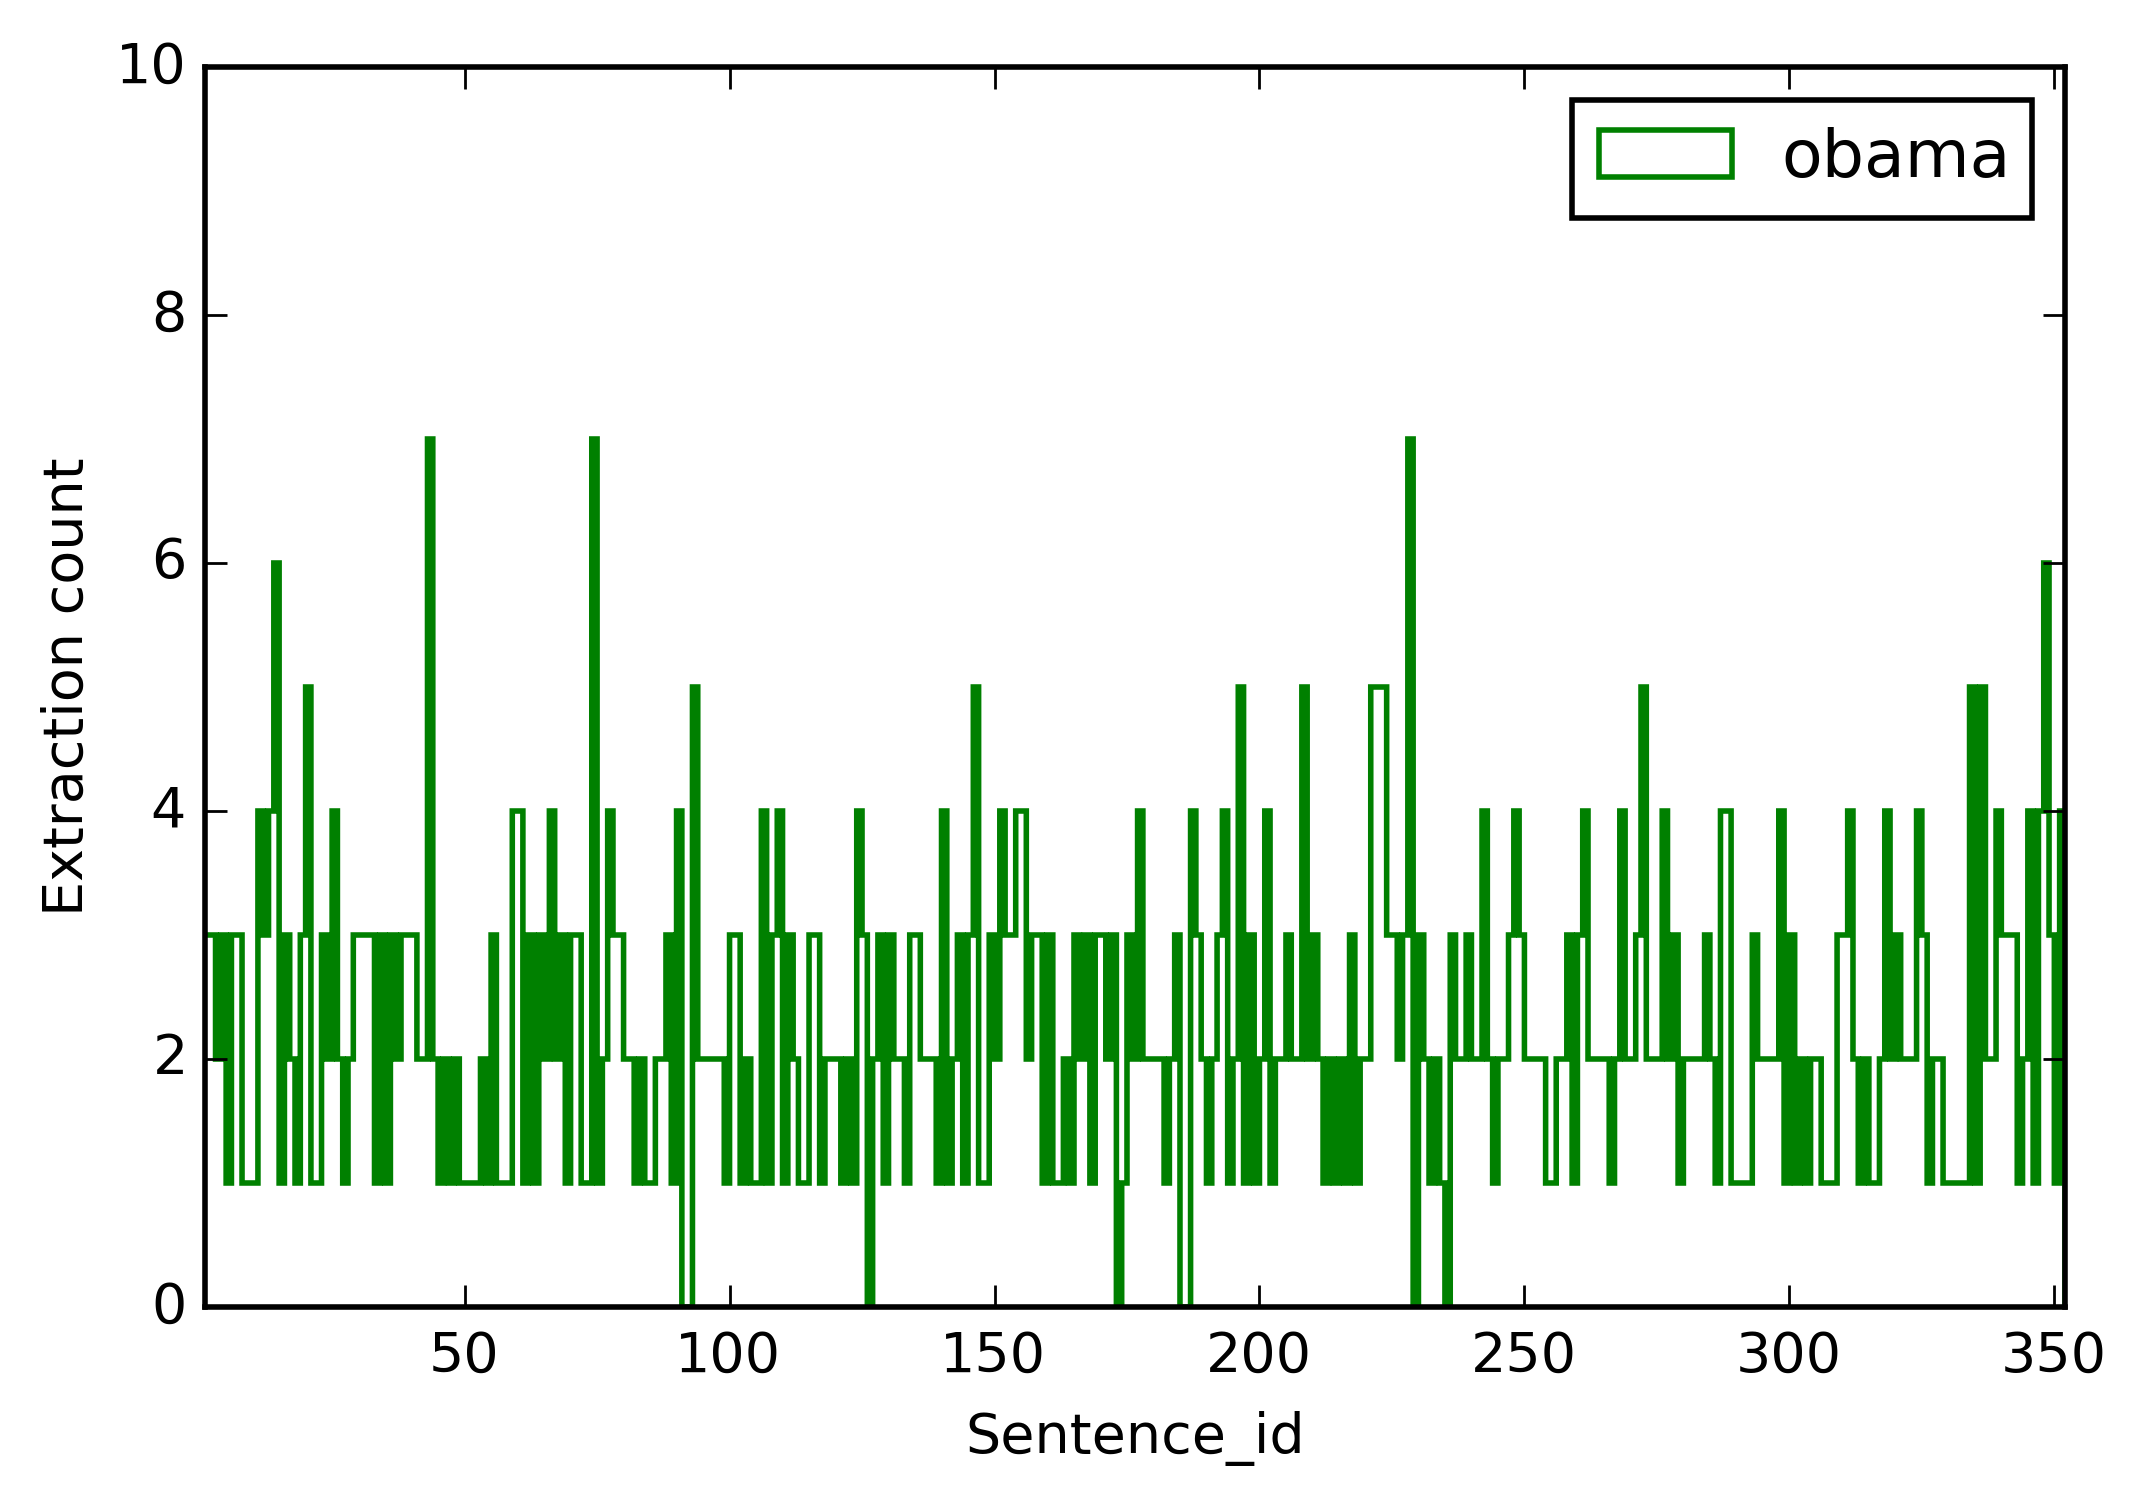

In [376]:
plt.hist(data['obama']['Sentence_id'], histtype='step', bins=max(data['obama']['Sentence_id']), color='g', label="obama")
plt.axis([1, max(data['obama']['Sentence_id']), 0, 10])
plt.legend()
plt.xlabel("Sentence_id")
plt.ylabel("Extraction count")
plt.show()

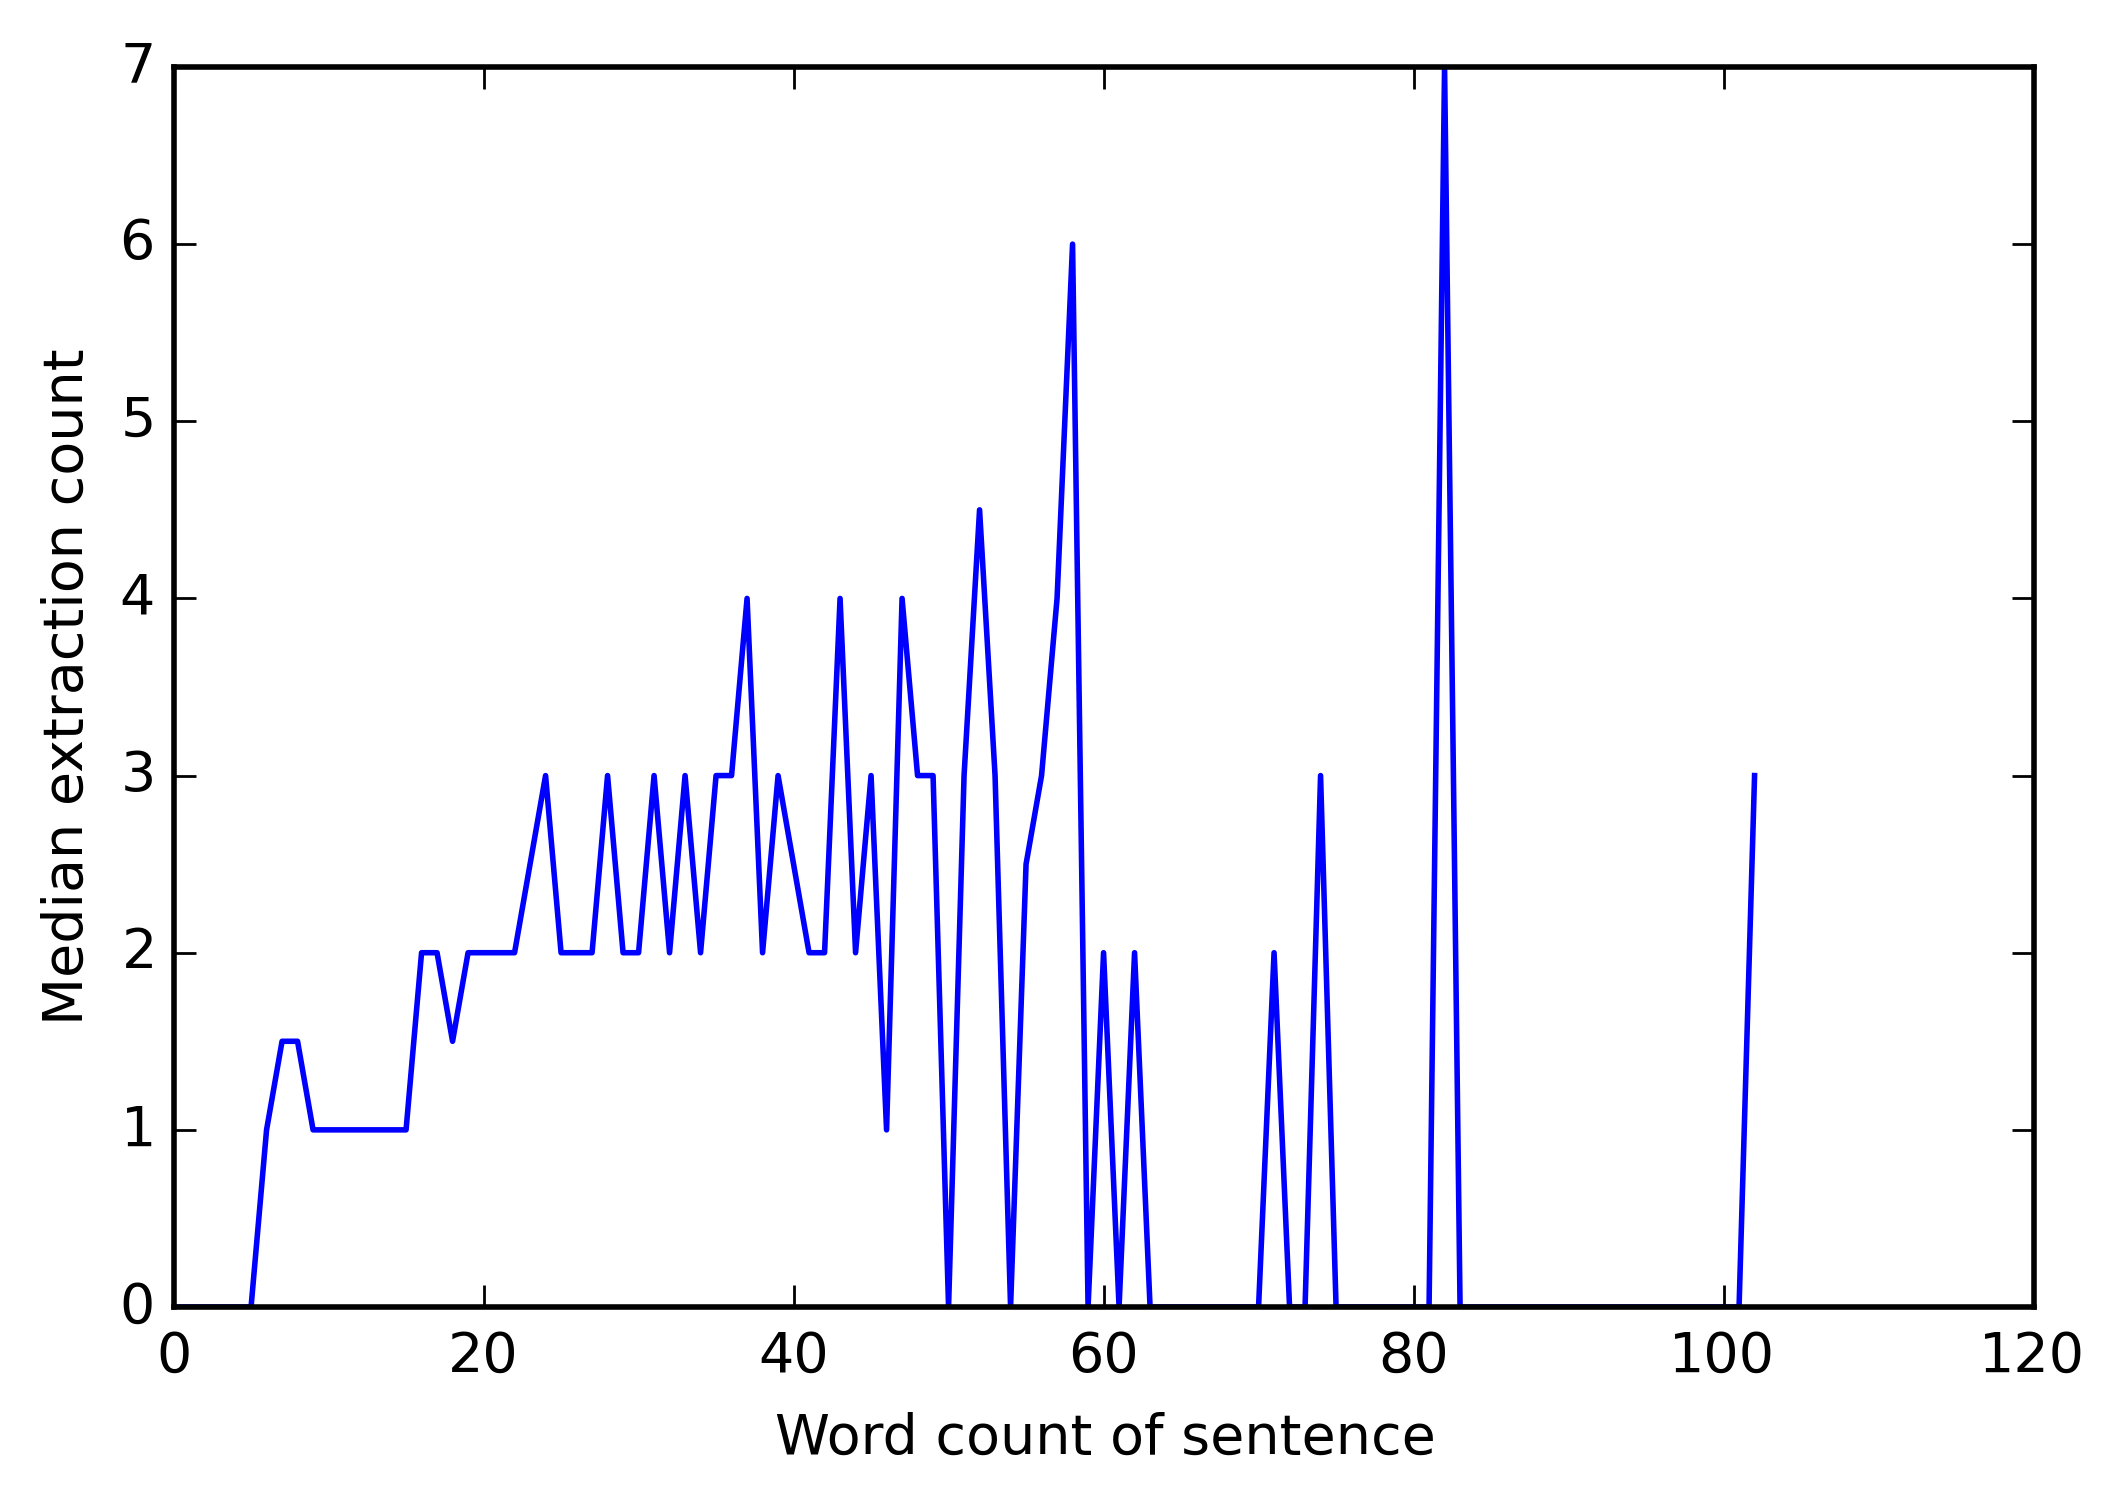

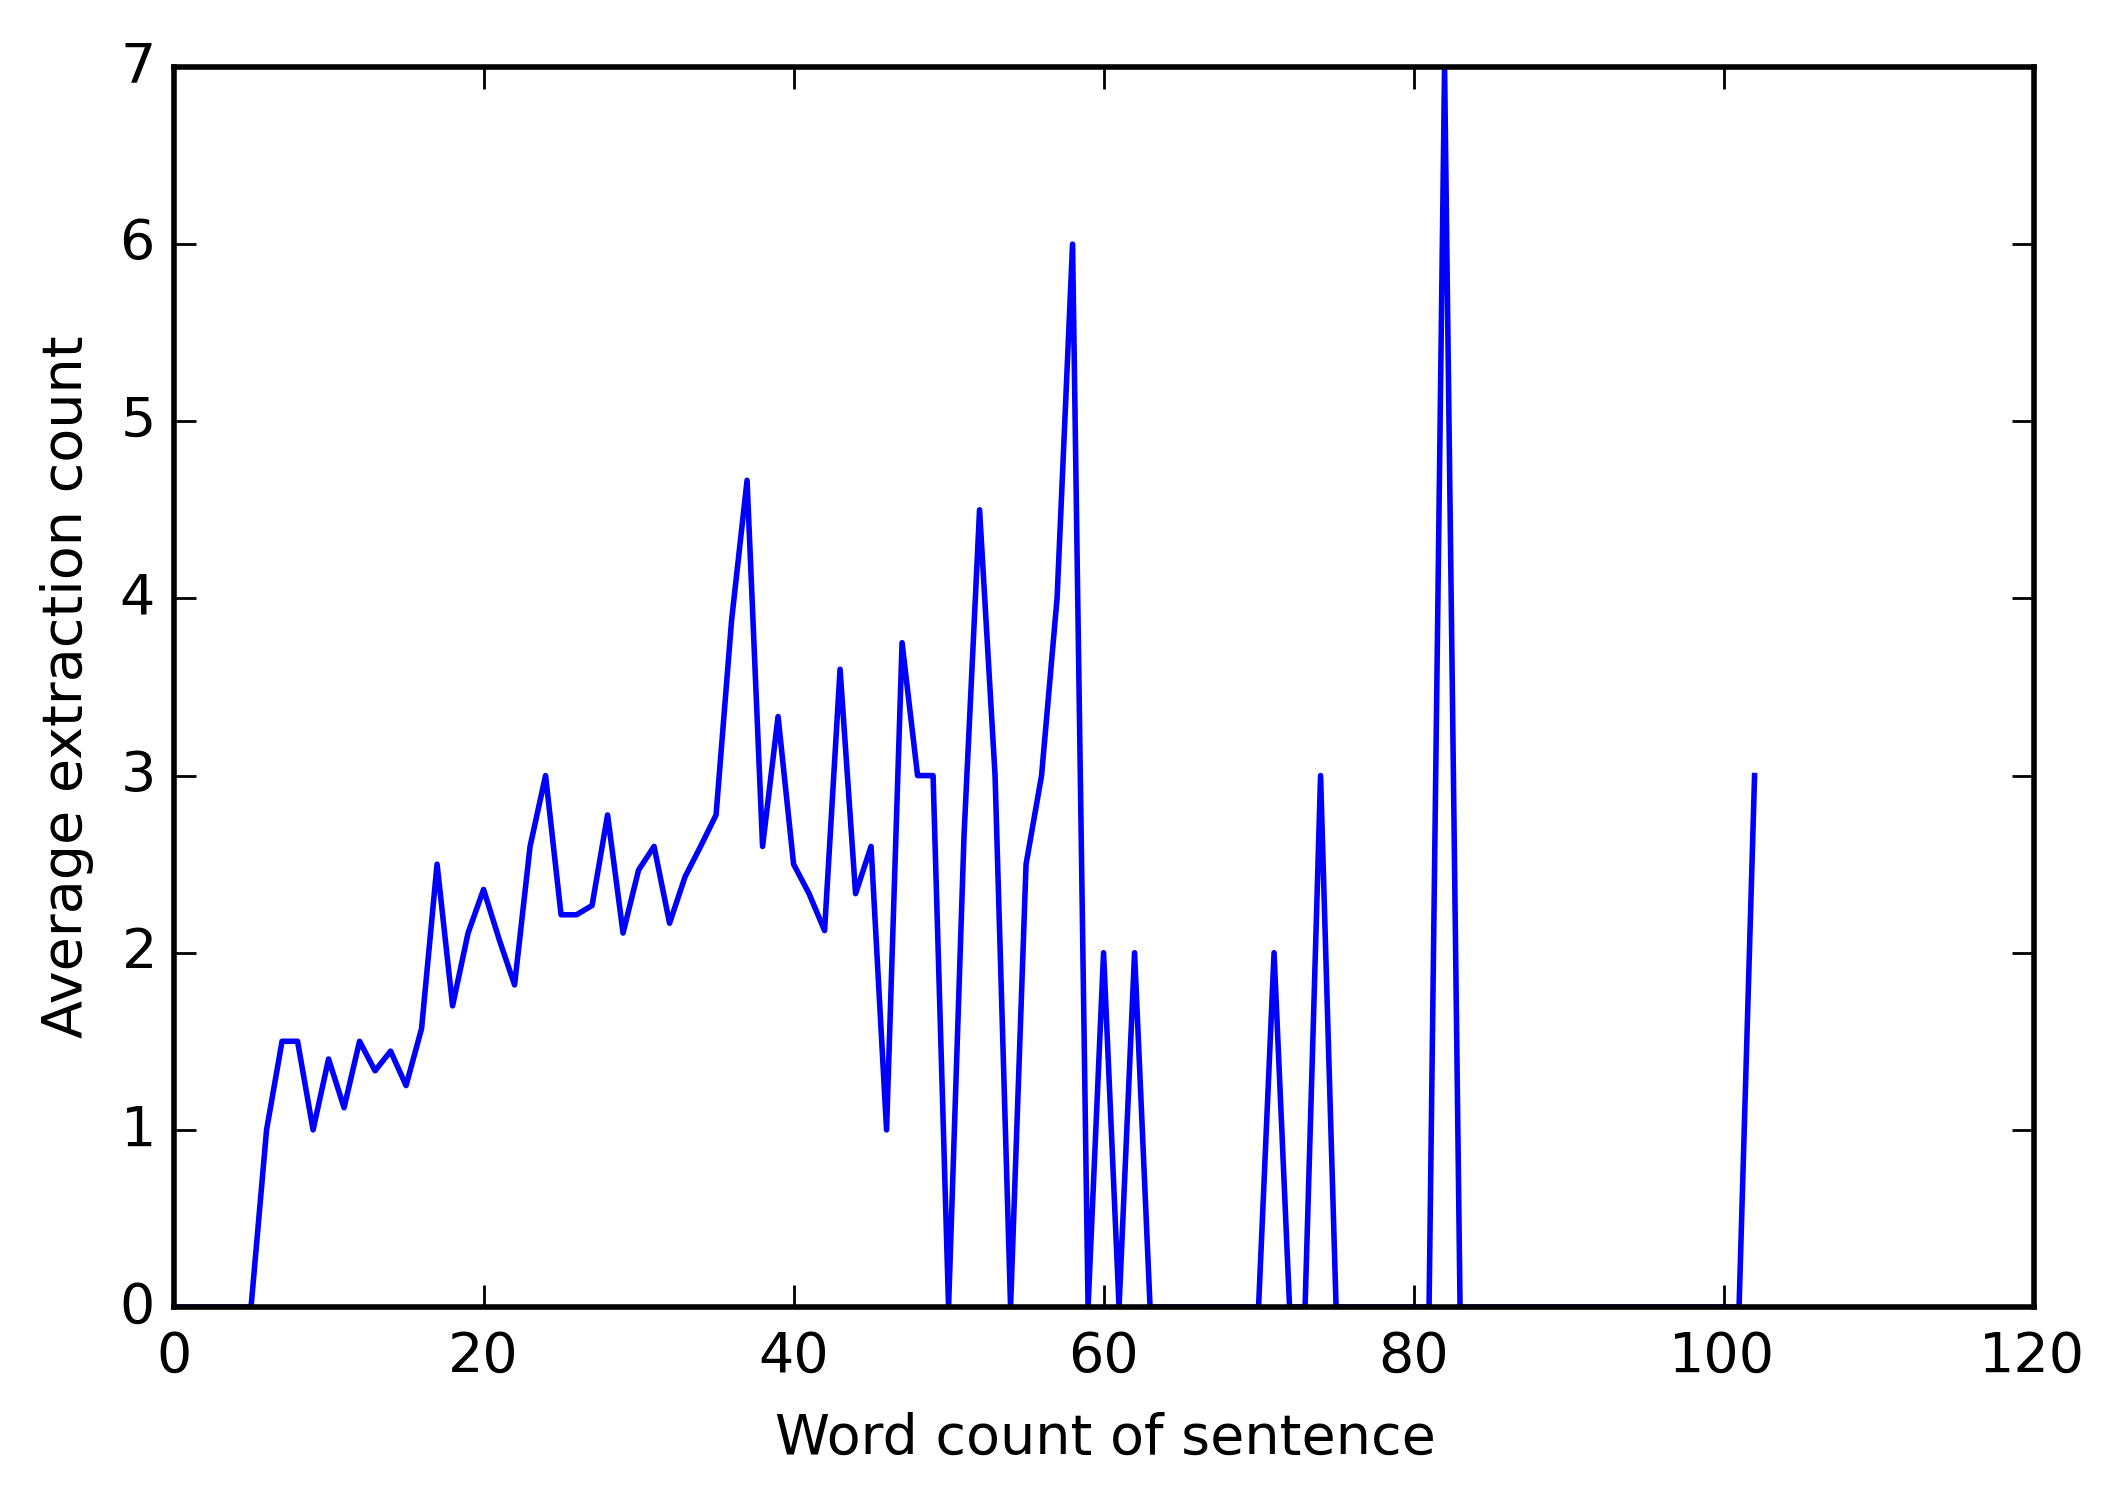

In [273]:
sentence_metadata = []
extractions_for_wordcounts = []
sentence_group = data['obama'].groupby('Sentence_id')
for g, grp in sentence_group:
    word_c = word_count(grp['Sentence'].iloc[0])
    ext_c = grp['Sentence_id'].count()
    if len(extractions_for_wordcounts) > word_c:
        if extractions_for_wordcounts[word_c][0] == 0:
            extractions_for_wordcounts[word_c] = [ext_c]
        else:
            extractions_for_wordcounts[word_c].append(ext_c)
    else:
        for i in range(len(extractions_for_wordcounts), word_c+1):
            extractions_for_wordcounts.append([0])
        extractions_for_wordcounts[word_c] = [ext_c]
    sentence_metadata.append({"id":grp['Sentence_id'].iloc[0], "extraction_count": ext_c, "word_count": word_c})

plt.plot([np.median(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Median extraction count")
plt.show()

plt.plot([np.average(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Average extraction count")
plt.show()

#All

In [286]:
all_dataframe = pd.concat([data['obama'], data['jupiter'], data['paris']])

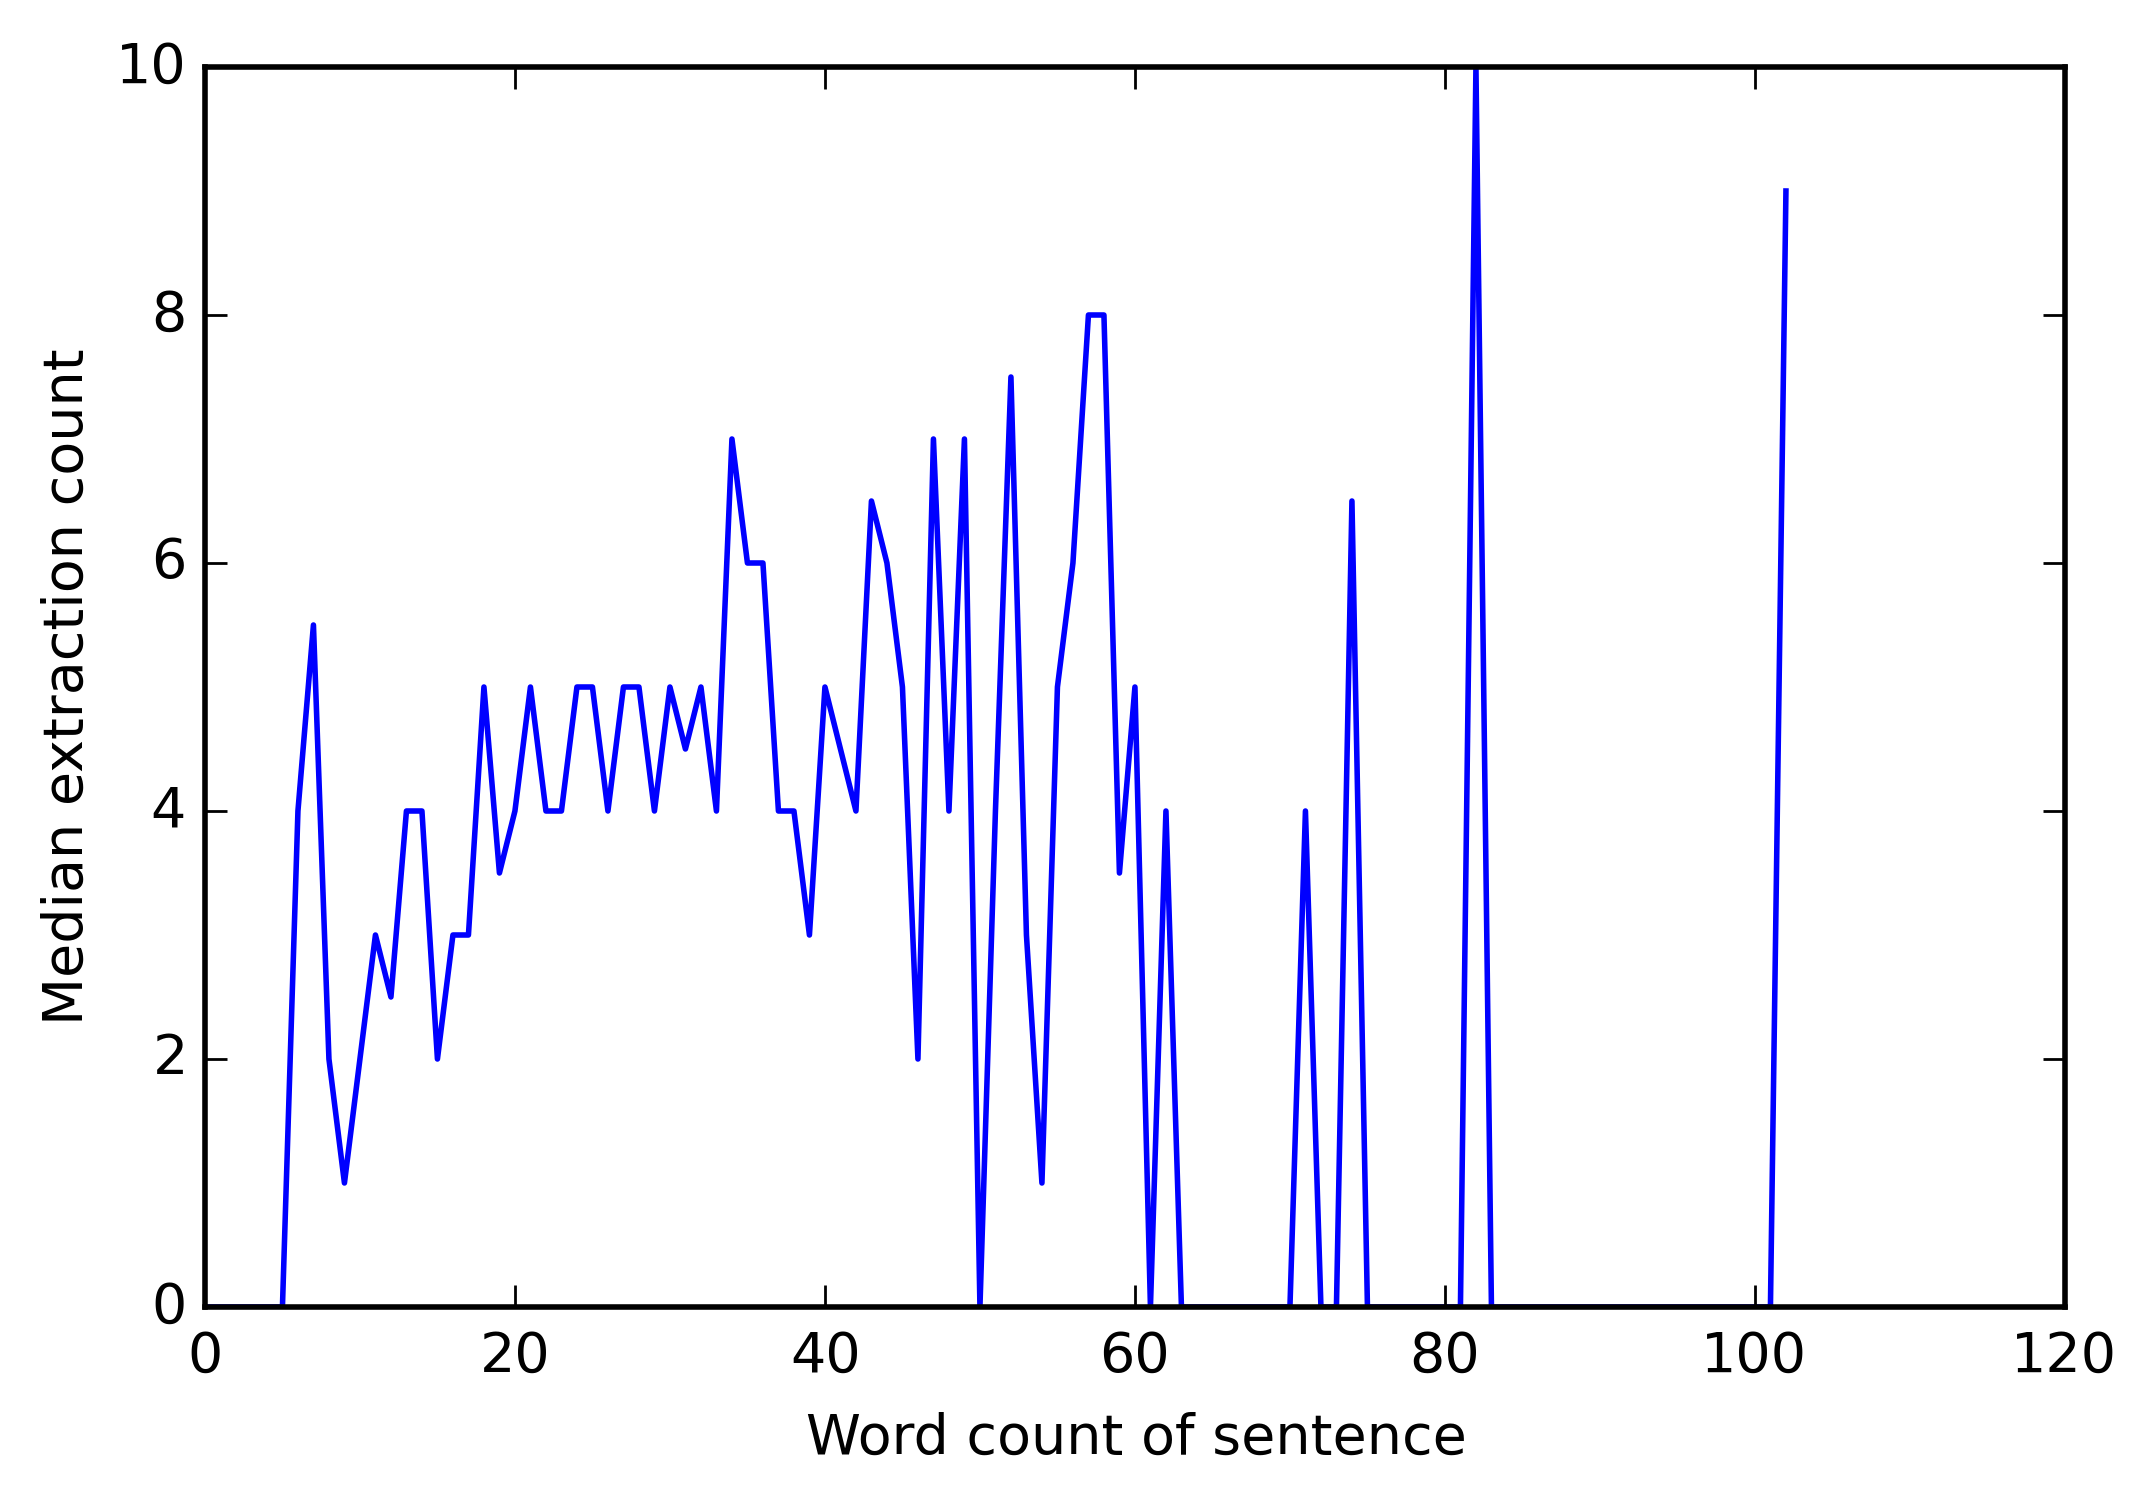

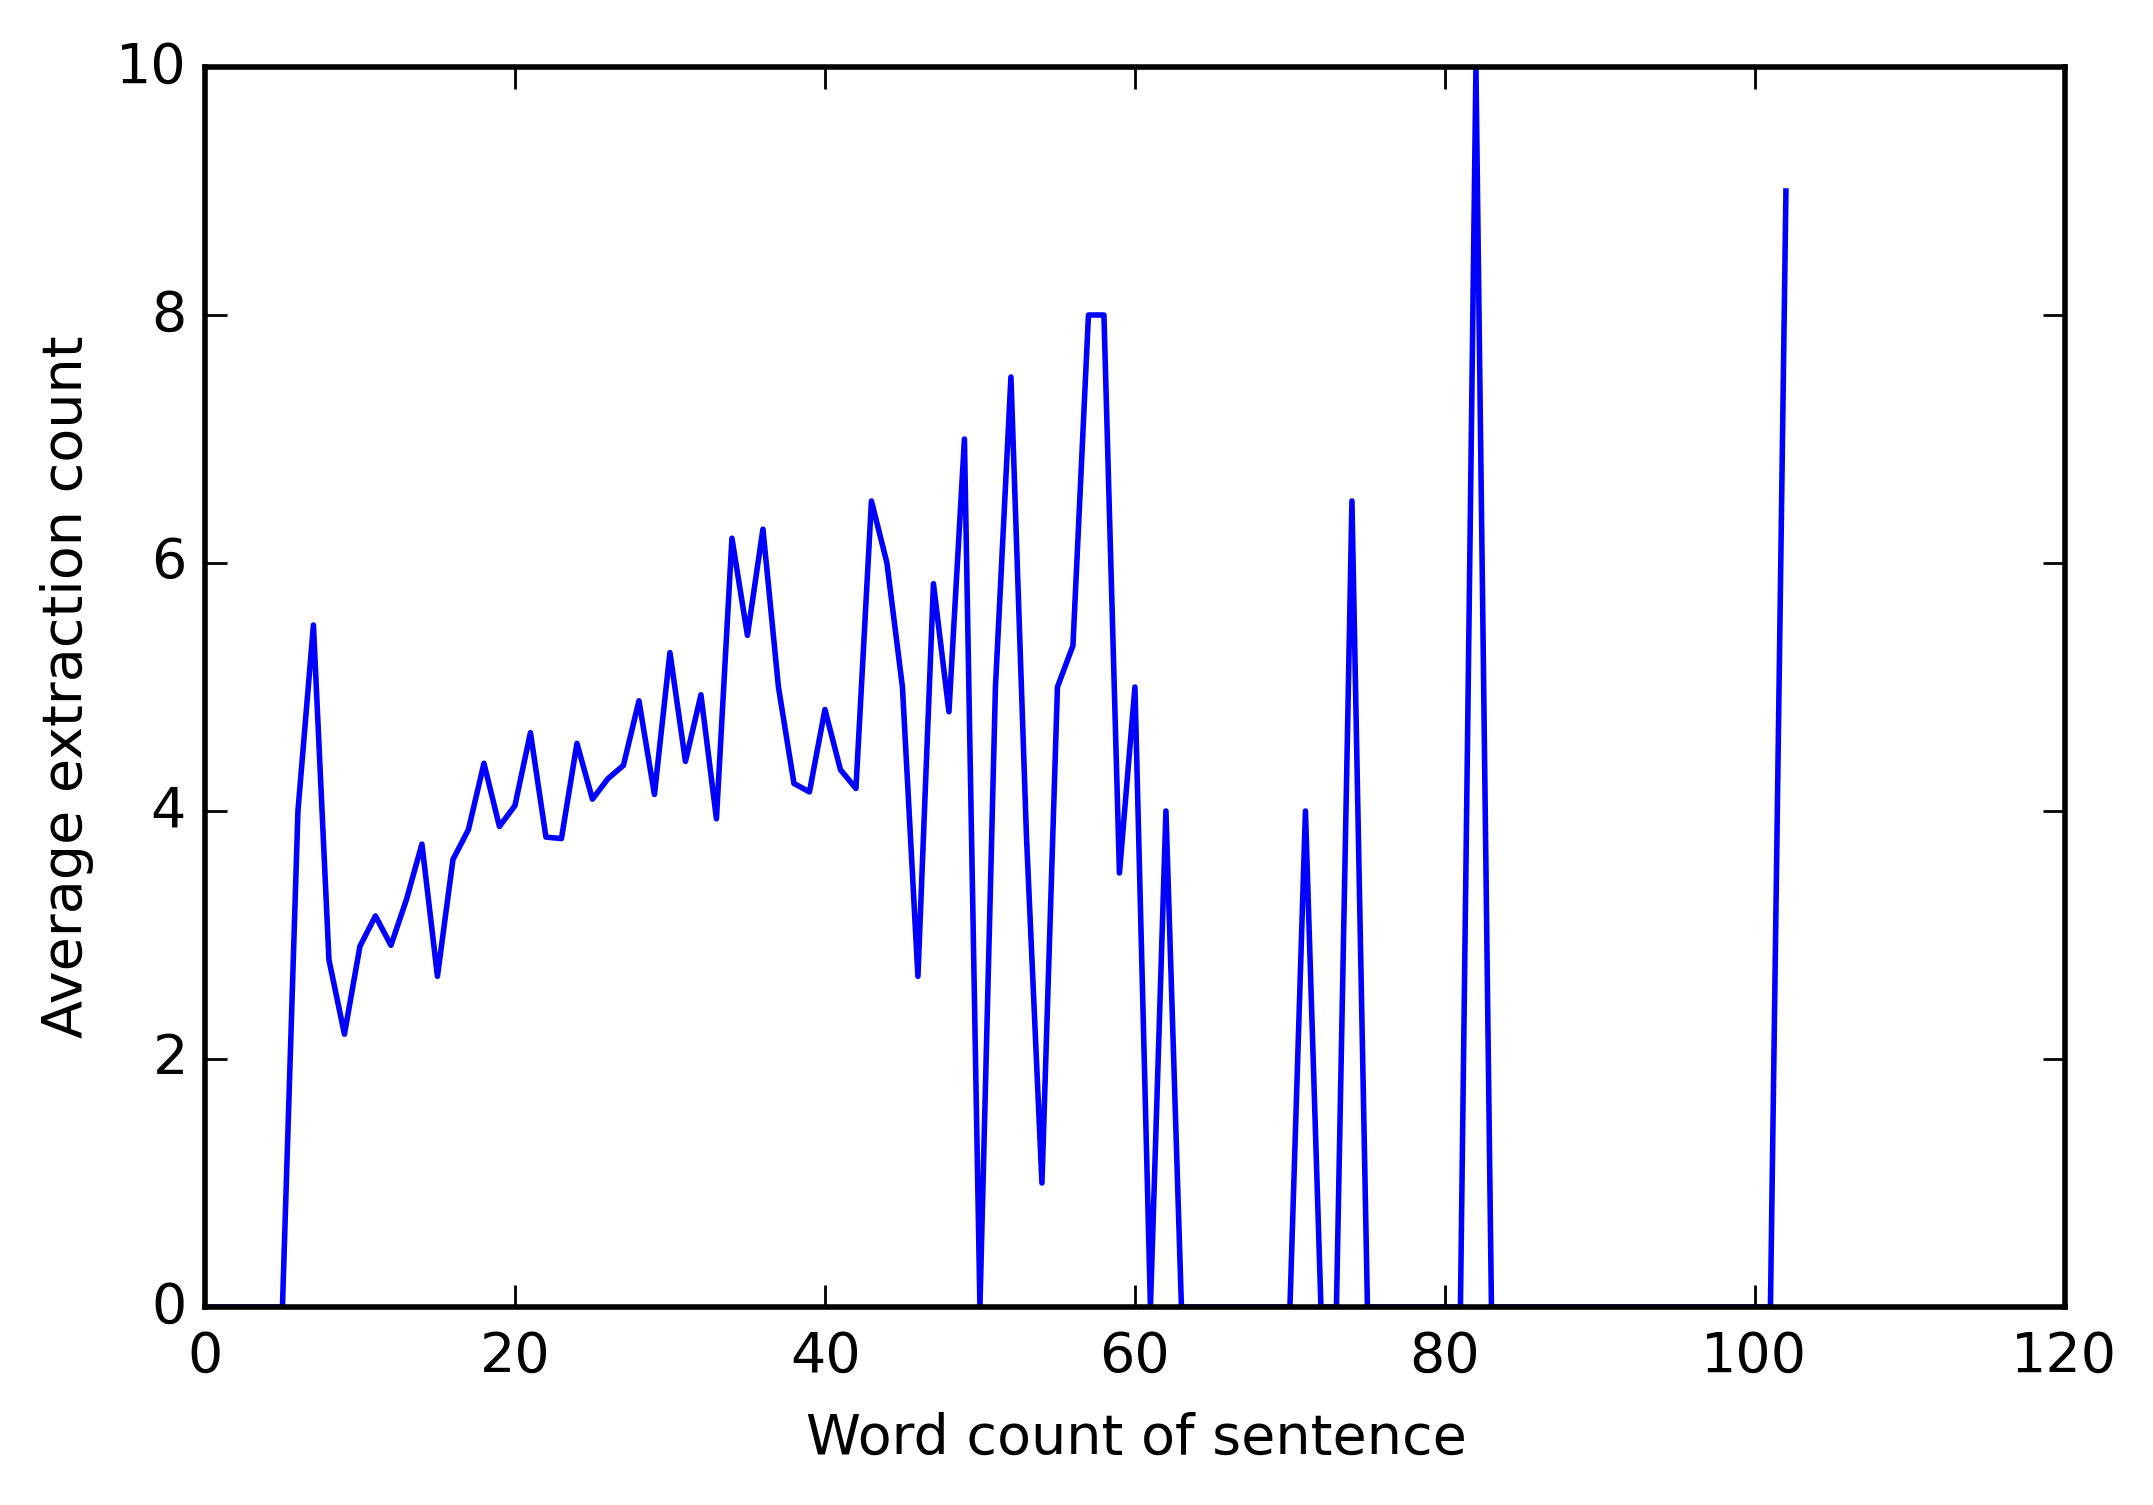

In [284]:
sentence_metadata = []
extractions_for_wordcounts = []
sentence_group = all_dataframe.groupby('Sentence_id')
for g, grp in sentence_group:
    word_c = word_count(grp['Sentence'].iloc[0])
    ext_c = grp['Sentence_id'].count()
    if len(extractions_for_wordcounts) > word_c:
        if extractions_for_wordcounts[word_c][0] == 0:
            extractions_for_wordcounts[word_c] = [ext_c]
        else:
            extractions_for_wordcounts[word_c].append(ext_c)
    else:
        for i in range(len(extractions_for_wordcounts), word_c+1):
            extractions_for_wordcounts.append([0])
        extractions_for_wordcounts[word_c] = [ext_c]
    sentence_metadata.append({"id":grp['Sentence_id'].iloc[0], "extraction_count": ext_c, "word_count": word_c})

plt.plot([np.median(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Median extraction count")
plt.show()

plt.plot([np.average(np.array(lst)) for lst in extractions_for_wordcounts])
plt.xlabel("Word count of sentence")
plt.ylabel("Average extraction count")
plt.show()